# Aug ??st, 2021 (play svinet)

**Motivation**: SVINET <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
task = 'rest'

mice = Mice(Config(128))
mice.combine_dfs(task, full=True)

 # 'sub-SLC02_ses-2' # 'sub-SLC'
mode = 'bold'
metric = 'pearson'
match_metric = 'cosine'
match_using = 'pi'
graph_type = 'real'

current expt: 'p20'

[PROGRESS] experiment loaded: 'p20',  total # runs:  999

[PROGRESS] some runs were excluded:     1 x k = 5

[PROGRESS] fit: initiated

[PROGRESS] kmeans fit: done

[PROGRESS] find best mappings: done

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

warning type 1

[PROGRESS] results aligned: done

  0%|          | 0/999 [00:00<?, ?it/s]

[PROGRESS] membership df: done

19
[0, 1, 2, 5, 4, 3]

23
[4, 1, 2, 3, 0, 5]

55
[0, 1, 2, 5, 4, 3]

245
[0, 1, 2, 3, 5, 4]

367
[0, 1, 2, 3, 5, 4]

412
[0, 1, 2, 4, 3, 5]

446
[5, 1, 2, 3, 4, 0]

514
[0, 4, 2, 3, 1, 5]

528
[0, 1, 2, 4, 3, 5]

617
[0, 1, 5, 3, 4, 2]

685
[0, 1, 2, 3, 5, 4]

788
[0, 1, 2, 3, 5, 4]

824
[0, 1, 2, 3, 5, 4]

846
[0, 1, 2, 3, 5, 4]

875
[0, 1, 2, 3, 5, 4]

940
[0, 1, 2, 3, 5, 4]

942
[0, 1, 2, 3, 5, 4]

[PROGRESS] 'result.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'perf.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'pi_cut.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'gam_all.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'lam_all.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'pi_all.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'gam.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'lam.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

[PROGRESS] 'pi.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC04_ses-2_n128/p20/k6-real-cosine-linksampling-(2021_08_29)

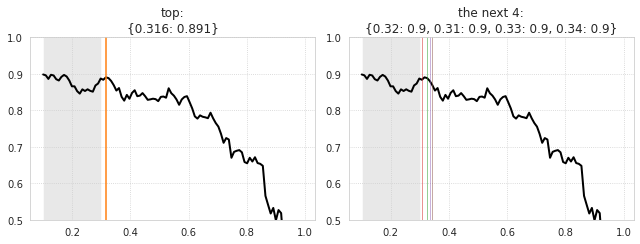

[PROGRESS] process results: done

[PROGRESS] fit: done!

00 - 00:00:37  (dd - hh:mm:ss)

In [3]:
k = 6
p = 20
key = 'sub-SLC04_ses-2'

start = time()
svinet = SVINET(
    mice=mice,
    num_k=k,
    perc=p,
    key=key,
    task=task,
    mode=mode,
    metric=metric,
    match_metric=match_metric,
    match_using=match_using,
    graph_type='real',
    verbose=True,
).load_runs(q=0.0).fit_svinet(n_bins=10, save_plots=False)
convert_time(time()-start)

In [4]:
len(svinet.get_result_dict())

999

In [5]:
svinet.scores()

+---------------+-------+-------+
| type          |  over | score |
+---------------+-------+-------+
| pi symmetry   |  oc1  |  0.92 |
| pi symmetry   |  oc2  |  0.64 |
| pi symmetry   |  oc3  |  0.96 |
| pi symmetry   |  oc4  |  0.72 |
| pi symmetry   |  oc5  |  0.92 |
| pi symmetry   |  oc6  |  0.91 |
| pi symmetry   |  avg  |  0.84 |
| ---           |  ---  |  ---  |
| entropy score | nodes |  0.82 |
| ---           |  ---  |  ---  |
| cosine        | nodes |  0.78 |
| correlation   | nodes |  0.68 |
| jensenshannon | nodes |  0.25 |
+---------------+-------+-------+

+---------------+-------+-------+
| type          |  over | score |
+---------------+-------+-------+
| pi symmetry   |  oc1  |  0.92 |
| pi symmetry   |  oc2  |  0.64 |
| pi symmetry   |  oc3  |  0.96 |
| pi symmetry   |  oc4  |  0.72 |
| pi symmetry   |  oc5  |  0.93 |
| pi symmetry   |  oc6  |  0.91 |
| pi symmetry   |  avg  |  0.85 |
| ---           |  ---  |  ---  |
| entropy score | nodes |  0.82 |
| ---           |  ---  |  ---  |
| cosine        | nodes |  0.76 |
| correlation   | nodes |  0.65 |
| jensenshannon | nodes |  0.27 |
| euclidean     | nodes |  0.27 |
+---------------+-------+-------+

In [30]:
np.linalg.norm(svinet.gam_all.reshape(len(svinet.gam_all), -1), axis=-1)

array([828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828., 828., 828.,
       828., 828., 828., 828., 828., 828., 828., 828., 828

In [31]:
svinet.gam_all

array([[[ 0.20606368, 62.7630247 ,  0.20606368, ..., 37.8218646 ,
          0.20606368, 84.27836226],
        [ 0.20606368,  0.2060884 , 84.27836226, ...,  0.20710222,
          0.20606368,  0.20606368],
        [ 0.20606368,  0.21014366,  0.20606368, ...,  0.20610077,
         84.27836226,  0.20606368],
        [ 0.20606368,  0.20643458,  0.20606368, ...,  0.20606368,
          0.20606368,  0.20606368],
        [84.27836226, 21.716122  ,  0.20606368, ..., 46.6441767 ,
          0.20606368,  0.20606368],
        [ 0.20606368,  0.20683022,  0.20606368, ...,  0.22334795,
          0.20606368,  0.20606368]],

       [[ 0.19647239,  0.19647239,  0.19647239, ...,  0.19647239,
          0.19647239,  0.19647239],
        [ 0.19647239,  0.19647239,  0.19647239, ...,  0.19647239,
          0.19647239,  0.19647239],
        [ 0.19647239,  0.19647239,  0.19647239, ...,  0.19647239,
          0.19647239,  0.19647239],
        [ 0.19647239,  0.19647239,  0.19647239, ..., 80.35560305,
          0.19647239, 80.35560305],
        [80.35560305, 80.35560305,  0.19647239, ...,  0.19647239,
         80.35560305,  0.19647239],
        [ 0.19647239,  0.19647239, 80.35560305, ...,  0.19647239,
          0.19647239,  0.19647239]],

       [[ 0.20687658,  2.88032221,  0.20687658, ...,  0.20687658,
          0.20687658,  0.20696346],
        [ 0.20687658,  0.20726136,  0.20687658, ...,  0.20687658,
          0.20687658,  0.20701311],
        [ 0.20687658,  0.2076089 ,  0.20687658, ...,  0.20749719,
          0.20687658,  0.20687658],
        [ 0.20687658,  4.87491179,  0.20687658, ...,  0.20811781,
          0.20687658, 37.90126091],
        [84.61083169, 77.26807238, 84.61083169, ..., 42.64524727,
          0.20687658, 12.80926835],
        [ 0.20687658,  0.20701311,  0.20687658, ..., 42.17058673,
         84.61083169, 34.31380734]],

       ...,

       [[ 0.19578652, 62.99772755,  0.19578652, ...,  0.19578652,
          0.19578652,  0.19779525],
        [ 0.19578652,  0.19578652,  0.19578652, ...,  0.19578652,
         80.07508822,  0.19578652],
        [ 0.19578652,  0.20255276,  0.19578652, ...,  0.19578652,
          0.19578652,  0.19578652],
        [ 0.19578652,  0.1960567 ,  0.19578652, ...,  0.19578652,
          0.19578652, 30.19538628],
        [80.07508822, 17.26605203,  0.19578652, ...,  0.19578652,
          0.19578652,  0.19578652],
        [ 0.19578652,  0.19583351, 80.07508822, ..., 80.07508822,
          0.19578652, 50.07346798]],

       [[73.04903024, 43.31416556,  0.19863979, ...,  0.19863979,
         81.24205468,  0.19863979],
        [ 0.19863979,  0.19868747,  0.19863979, ...,  0.19915227,
          0.19863979,  0.19863979],
        [ 0.20587411,  0.20590986,  0.19863979, ...,  0.19863979,
          0.19863979,  0.19863979],
        [ 0.20108301, 38.11880594,  0.19863979, ...,  0.19863979,
          0.19863979,  0.19863979],
        [ 8.38186751,  0.19886624, 81.24205468, ..., 60.98021175,
          0.19863979, 81.24205468],
        [ 0.19874706,  0.19880665,  0.19863979, ..., 20.45995832,
          0.19863979,  0.19863979]],

       [[78.39057886, 40.05403422,  0.19166783, ...,  0.19187483,
          0.19166783,  0.19182883],
        [ 0.19166783,  0.19205883,  0.19166783, ...,  0.19166783,
          0.19166783,  0.19198983],
        [ 0.19166783,  0.21880745, 78.39057886, ...,  0.19166783,
          0.19166783,  0.19166783],
        [ 0.19166783, 38.50055536,  0.19166783, ...,  0.19254182,
          0.19166783, 35.85886964],
        [ 0.19166783,  0.19174833,  0.19166783, ..., 19.74185558,
         78.39057886,  0.19185183],
        [ 0.19166783,  0.19170233,  0.19166783, ..., 58.83929863,
          0.19166783, 42.72268706]]])

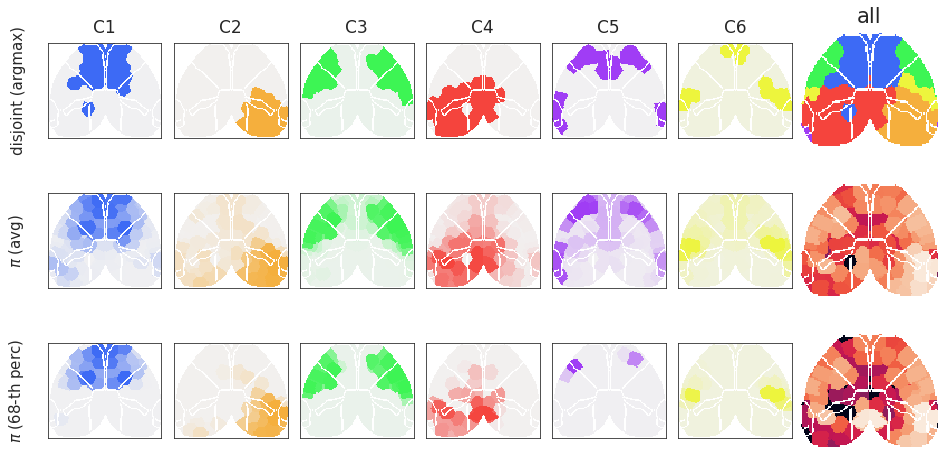

In [6]:
_ = svinet.plot_memberships_2d()

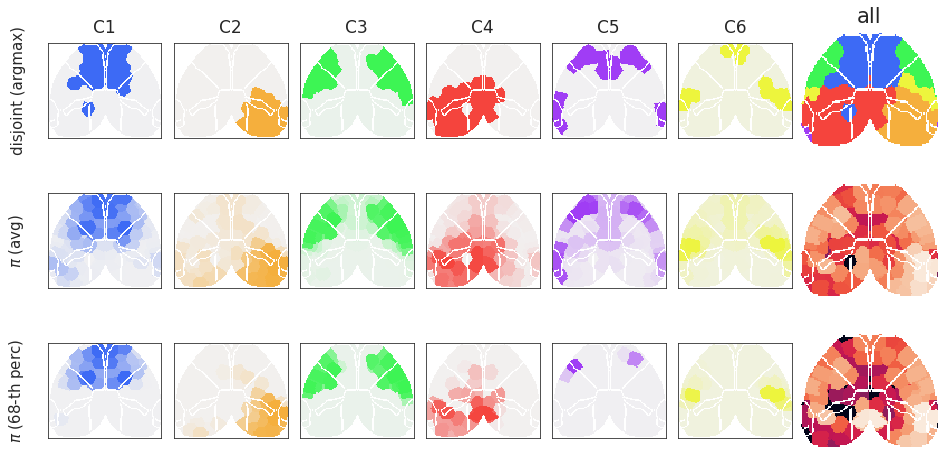

In [20]:
## this was cosine + cosine

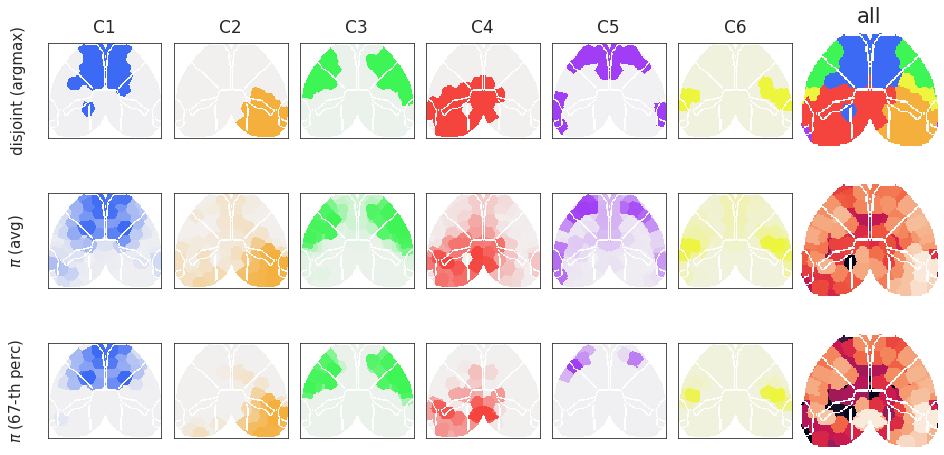

In [10]:
## This was original euc + cosine

In [12]:
svinet.render()

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC08_ses-2_n128/p20/k6-real-pi-cosine-linksampling-(
2021_08_11)/render/overlap_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC08_ses-2_n128/p20/k6-real-pi-cosine-linksampling-(
2021_08_11)/render/disjoint_cortex_k6.html

In [11]:
gam = svinet.gam.copy()
# gam /= gam.sum(0, keepdims=True)

<matplotlib.colorbar.Colorbar object at 0x7fafa61db370>

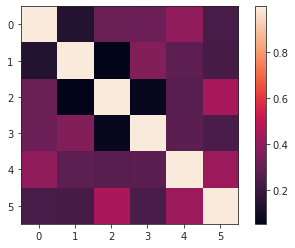

In [12]:
plt.imshow(dist2sim(sp_dist.cdist(gam, svinet.pi, metric='cosine')))
plt.colorbar()

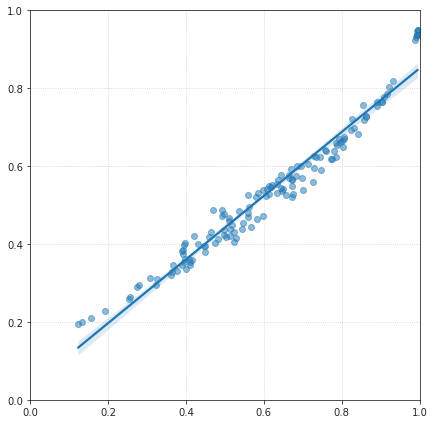

In [13]:
fig, ax = create_figure(1, 1, (7, 6), 'ticks')
sns.regplot(x=svinet.h, y=svinet.b, scatter_kws={'alpha': 0.5}, ax=ax)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect='equal')
ax.grid()
plt.show()

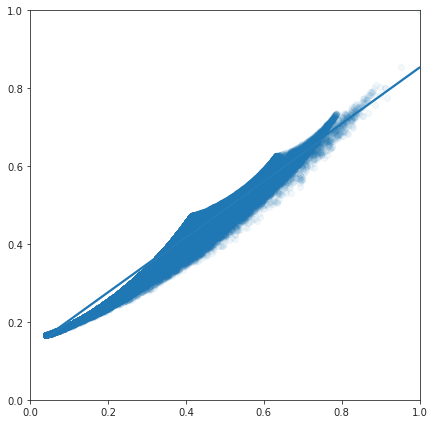

In [14]:
fig, ax = create_figure(1, 1, (7, 6), 'ticks')
sns.regplot(x=svinet.h_all.ravel(), y=svinet.b_all.ravel(), scatter_kws={'alpha': 0.05}, ax=ax)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect='equal')
plt.show()

In [15]:
bins = int(1e6)

x, bin_edges = np.histogram(svinet.h_all.ravel(), bins=bins)
y, bin_edges = np.histogram(svinet.b_all.ravel(), bins=bins)
m, res = np.polyfit(x, y, 1)
m, res

ValueError: autodetected range of [nan, nan] is not finite

## Align loaded fits using svinet.gam

In [3]:
k = 4
p = 20

gammas = {}
for sub in tqdm(mice.cfg.sub_ids):
    for ses in mice.cfg.ses_ids:
        key = mice.get_key(sub, ses)
        svinet = SVINET(
            mice=mice,
            num_k=k,
            perc=p,
            key=key,
            mode=mode,
            metric=metric,
            match_metric=match_metric,
            match_using=match_using,
            graph_type='real',
            verbose=False,
        ).load_results(full_process=False)
        gammas[key] = svinet.gam

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
centroids, model = fit_kmeans(
    data=np.concatenate(list(gammas.values())),
    n_clusters=k,
    match_metric='cosine',
    random_state=mice.cfg.random_state,
)
_masks = svinet.masks_from_pi(
    pi=centroids,
    disjoint=True,
    cortex_only=True,
)
global_mapping = align_centroid_to_structs(
    struct_ids=svinet.struct_ids,
    masks_mv=_masks,
    allen=mice.allen,
)
centroids = centroids[global_mapping]
perms = find_best_mappings(
    centroids=centroids,
    data=gammas,
    match_metric='cosine',
)
gammas_algn = {
    k: g[list(perms[k].values())]
    for k, g in gammas.items()
}

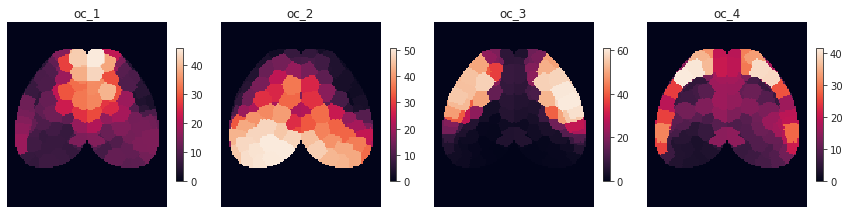

In [6]:
nrows = 1
ncols = int(np.ceil((k / nrows)))
fig, axes = create_figure(nrows, ncols, (12, 4))

gam_arr = svinet.pi2arr(centroids, cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)#, cmap=svinet.cmaps[idx])
    ax.set_title(f"oc_{idx}")
    plt.colorbar(im, ax=ax, shrink=0.5)
remove_ticks(axes)
plt.show()

In [ ]:
### Run below to see if they are aligned goodly

In [ ]:
fig, axes = create_figure(len(gammas_algn), k, (13, 2.4 * len(gammas_algn)))

for i, (key, gam) in tqdm(enumerate(gammas_algn.items())):
    gam_arr = svinet.pi2arr(gam, cortex_only=True)
    for j, idx in enumerate(range(1, k + 1)):
        im = axes[i, j].imshow(gam_arr[idx], cmap='rocket', vmin=0)
        # plt.colorbar(im, ax=axes[i, j], shrink=0.5)
        if i == 0:
            axes[i, j].set_title(f"oc_{idx}\n")
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n")
remove_ticks(axes)
plt.show()

In [7]:
gam = [np.expand_dims(g, axis=0) for g in gammas_algn.values()]
gam = np.concatenate(gam)
gam = gam.mean(0)
gam.shape

(4, 138)

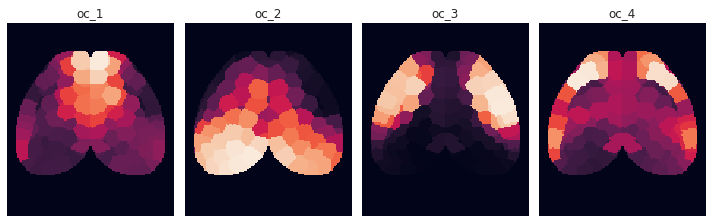

In [8]:
fig, axes = create_figure(1, 4, (10, 6))
gam_arr = svinet.pi2arr(gam, cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
    # plt.colorbar(im, ax=ax, shrink=0.5)
remove_ticks(axes)
plt.show()

In [9]:
perms

{
    'sub-SLC01_ses-1': {0: 3, 1: 0, 2: 1, 3: 2},
    'sub-SLC01_ses-2': {0: 2, 1: 0, 2: 1, 3: 3},
    'sub-SLC01_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC02_ses-1': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC02_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC02_ses-3': {0: 0, 1: 3, 2: 2, 3: 1},
    'sub-SLC03_ses-1': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC03_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC03_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC04_ses-1': {0: 3, 1: 0, 2: 2, 3: 1},
    'sub-SLC04_ses-2': {0: 2, 1: 0, 2: 1, 3: 3},
    'sub-SLC04_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC05_ses-1': {0: 3, 1: 0, 2: 1, 3: 2},
    'sub-SLC05_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC05_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC06_ses-1': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC06_ses-2': {0: 3, 1: 1, 2: 2, 3: 0},
    'sub-SLC06_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC07_ses-1': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC07_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC07_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC08_ses-1': {0: 3, 1: 0, 2: 1, 3: 2},
    'sub-SLC08_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC08_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC09_ses-1': {0: 3, 1: 1, 2: 2, 3: 0},
    'sub-SLC09_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC09_ses-3': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC10_ses-1': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC10_ses-2': {0: 0, 1: 1, 2: 2, 3: 3},
    'sub-SLC10_ses-3': {0: 0, 1: 1, 2: 2, 3: 3}
}

In [10]:
fix_idx = np.concatenate([np.array(list(v.values())).reshape(1, -1) for v in perms.values()])
fix_idx.shape

(30, 4)

In [11]:
ctr = {}
for i in range(k):
    ctr[i] = collections.Counter(fix_idx[:, i]).most_common()
ctr

{
    0: [(0, 22), (3, 6), (2, 2)],
    1: [(1, 23), (0, 6), (3, 1)],
    2: [(2, 25), (1, 5)],
    3: [(3, 23), (2, 3), (1, 2), (0, 2)]
}

## New (p00)

current expt: 'p20'

[PROGRESS] experiment loaded: 'p20',  total # runs:  983

[PROGRESS] some runs were excluded:     17 x k = 5

[PROGRESS] fit: initiated

[PROGRESS] kmeans fit: done

  0%|          | 0/1 [00:00<?, ?it/s]

[PROGRESS] find best mappings: done

[PROGRESS] results aligned: done

  0%|          | 0/983 [00:00<?, ?it/s]

[PROGRESS] membership df: done

[PROGRESS] 'result.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(2021_08_10)

[PROGRESS] 'perf.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(2021_08_10)

[PROGRESS] 'pi_cut.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(2021_08_10)

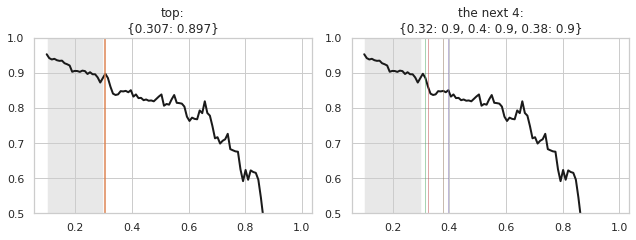

[PROGRESS] process results: done

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(
2021_08_10)/render/overlap_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(
2021_08_10)/render/disjoint_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(
2021_08_10)/render/overlap_brain_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k6-real-pi-cosine-linksampling-(
2021_08_10)/render/disjoint_brain_k6.html

[PROGRESS] save plots & render: done

[PROGRESS] fit: done!

00 - 00:02:19  (dd - hh:mm:ss)

In [29]:
k = 6
p = 20

start = time()
svinet = SVINET(
    mice=mice,
    num_k=k,
    perc=p,
    key=mice.get_key(7, 1),
    mode=mode,
    metric=metric,
    match_metric=match_metric,
    match_using=match_using,
    graph_type='real',
    verbose=True,
).load_runs(q=0.0).fit_svinet()
convert_time(time()-start)

In [30]:
svinet.scores()

+---------------+-------+-------+
| type          |  over | score |
+---------------+-------+-------+
| pi symmetry   |  oc1  |  0.95 |
| pi symmetry   |  oc2  |  0.9  |
| pi symmetry   |  oc3  |  0.98 |
| pi symmetry   |  oc4  |  0.71 |
| pi symmetry   |  oc5  |  0.87 |
| pi symmetry   |  oc6  |  0.94 |
| pi symmetry   |  avg  |  0.89 |
| ---           |  ---  |  ---  |
| entropy score | nodes |  0.87 |
| ---           |  ---  |  ---  |
| cosine        | nodes |  0.78 |
| correlation   | nodes |  0.69 |
| jensenshannon | nodes |  0.64 |
+---------------+-------+-------+

In [15]:
fixed = {}
for i, id_list in enumerate(svinet.struct_ids):
    _masks = []
    for _id in id_list:
        _m = svinet.mice.allen['mcc'].get_structure_mask(_id)[0]
        _masks.append(_m)
    combined_mask = functools.reduce(np.logical_or, _masks)
    fixed[i] = np.array(combined_mask, dtype=bool)

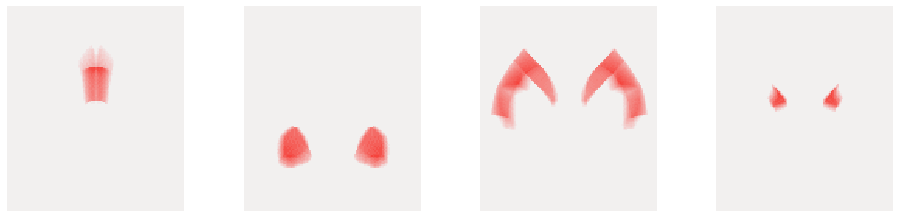

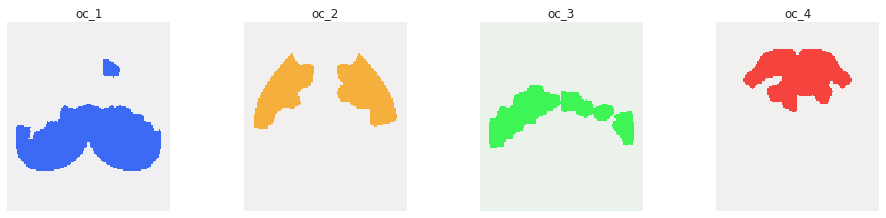

In [18]:
fig, axes = create_figure(1, 4, (13.5, 3.2))
for ax, m in zip(axes.ravel(), fixed.values()):
    ax.imshow(m.mean(1), cmap=svinet.cmaps[idx])
remove_ticks(axes)
plt.show()

masks = svinet.masks_from_pi(disjoint=True,)

fig, axes = create_figure(1, k, (13.5, 3.2))

for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    x = project_vol_2d(masks[idx], mice.allen['dims_flat'], 'max_proj')
    ax.imshow(x, cmap=svinet.cmaps[idx])
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

In [19]:
_, mappings = clusters_sim_scores(
    masks_fx=fixed,
    masks_mv=masks,
    assert_equal=False,
)

In [21]:
mappings

{
    'dice': {0: 2, 1: 0, 2: 1, 4: 3},
    'overlap': {0: 3, 1: 0, 2: 1, 3: 2},
    'jaccard': {0: 2, 1: 0, 2: 1, 4: 3}
}

In [20]:
mappings['dice']

{0: 2, 1: 0, 2: 1, 4: 3}

In [13]:
list(mappings['dice'].values())

[2, 0, 1, 3]

In [24]:
p = 20
window = 10
valid_measures = [
    'nll',
    'nll_link',
    'nll_nonlink',
    'nll_sparse',
    'nll_sparse_link',
    'nll_sparse_nonlink',
]

df_list = []
dlist_perf = []
dlist_valid = []
pi_global = collections.defaultdict(dict)
h_global = collections.defaultdict(dict)
for k in tqdm([4, 5, 6, 7, 8, 9]):
    for sub in mice.cfg.sub_ids:
        for ses in mice.cfg.ses_ids:
            key = mice.get_key(sub, ses)

            svinet = SVINET(
                mice=mice,
                num_k=k,
                perc=p,
                key=key,
                mode=mode,
                metric=metric,
                match_metric=match_metric,
                match_using=match_using,
                graph_type='real',
                verbose=False,
            ).load_results(full_process=False)

            _df = svinet.pi_cut_df.drop(columns='run')
            _df = pd.concat([pd.DataFrame(columns=['key', 'k', 'p']), _df])
            _df.loc[:, 'key'] = key
            _df.loc[:, 'k'] = k
            _df.loc[:, 'p'] = p
            df_list.append(_df)

            scores = {
                'symmetry': svinet.pi_symmetry_score(decimals=10)[-1],
                'entropy': svinet.entropy_score(decimals=10),
                **svinet.node_similarity_score(decimals=10),
            }
            dlist_perf.append({
                'value': scores.values(),
                'label': scores.keys(),
                'key': [key] * len(scores),
                'k': [k] * len(scores),
                'p': [p] * len(scores),
            })

            for run in svinet.get_result_dict().values():
                for lbl in valid_measures:
                    dlist_valid.append({
                        'iter': range(window),
                        'value': run['valid'][lbl][-window:],
                        'label': [lbl] * window,
                        'key': [key] * window,
                        'k': [k] * window,
                        'p': [p] * window,
                    })

df = pd.concat(df_list)
df_perf = pd.DataFrame(merge_dicts(dlist_perf))
df_valid = pd.DataFrame(merge_dicts(dlist_valid))

  0%|          | 0/6 [00:00<?, ?it/s]

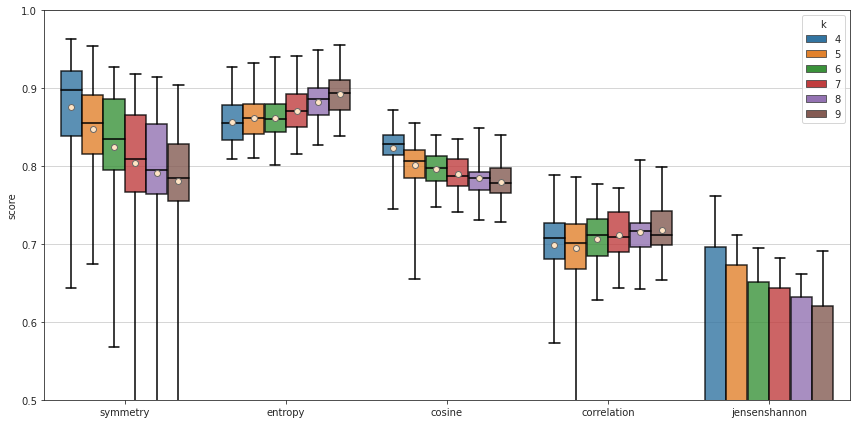

In [25]:
meanprops = {
    "marker": "o",
    "markerfacecolor": "bisque",
    "markeredgecolor": "dimgrey",
    "markersize": "6",
}
props = {
    'boxprops': {'alpha': 0.8, 'edgecolor': 'k'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k'}
}

fig, ax = create_figure(1, 1, (12, 6), 'ticks')
sns.boxplot(
    data=df_perf,
    x='label',
    y='value',
    hue='k',
    whis=np.inf,
    showmeans=True,
    meanprops=meanprops,
    ax=ax,
    **props,
)
ax.set(xlabel='', ylabel='score', ylim=(0.5, 1.0))
ax.grid(axis='y')

<AxesSubplot:xlabel='k', ylabel='value'>

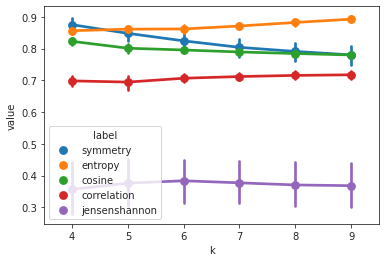

In [26]:
sns.pointplot(
    data=df_perf,
    hue='label',
    y='value',
    x='k',
    ci=95,
)

<AxesSubplot:xlabel='iter', ylabel='value'>

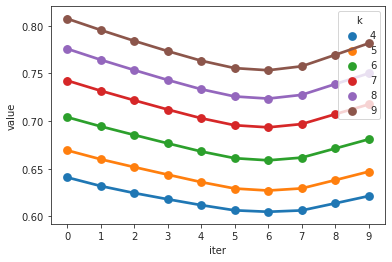

In [27]:
sns.pointplot(
    data=df_valid.loc[df_valid.label == 'nll'],
    x='iter',
    y='value',
    hue='k',
)

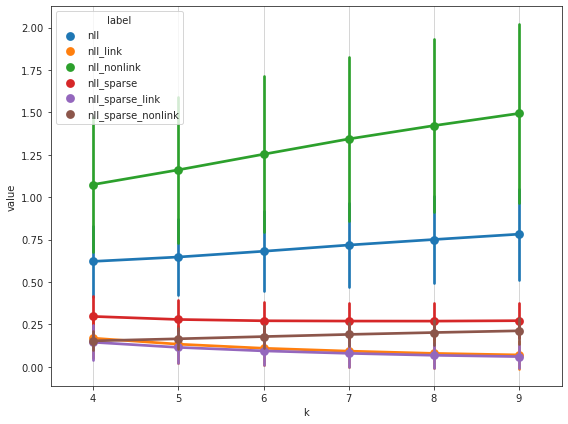

In [28]:
fig, ax = create_figure(1, 1, (8, 6), 'ticks')
sns.pointplot(
    data=df_valid.loc[df_valid.iter == max(df_valid.iter.unique())],
    x='k',
    y='value',
    hue='label',
    ci='sd',
    # err_style="bars",
    # style='label',
    # # markers=True,
    # dashes=False,
    # markersize=15,
    lw=2,
    alpha=0.9,
    err_kws={'capsize': 10},
    ax=ax,
)
# ax.set_xticks(df_valid.k.unique())
ax.grid(axis='x')

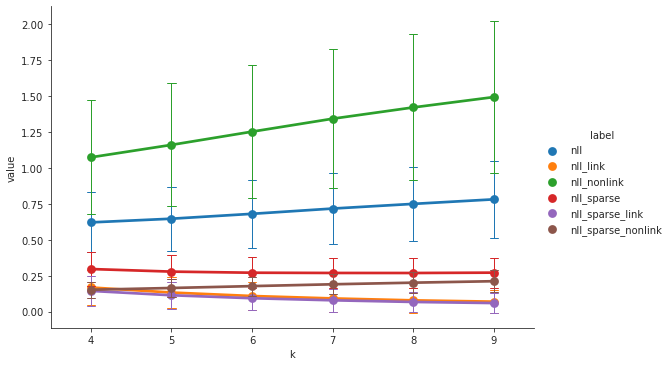

In [29]:
fg = sns.catplot(
    data=df_valid.loc[df_valid.iter == max(df_valid.iter.unique())],
    x='k',
    y='value',
    hue='label',
    kind='point',
    ci='sd',
    capsize=.1,
    aspect=1.5,
    errwidth=1.,
)
plt.show()

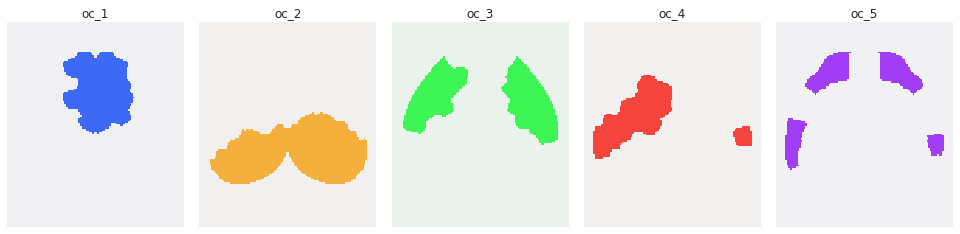

In [21]:
fig, axes = create_figure(1, k, (13.5, 3.2))

masks = svinet.masks_from_pi(gam, disjoint=True, cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    x = project_vol_2d(masks[idx], mice.allen['dims_flat'], 'max_proj')
    ax.imshow(x, cmap=svinet.cmaps[idx])
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

KeyError: 6

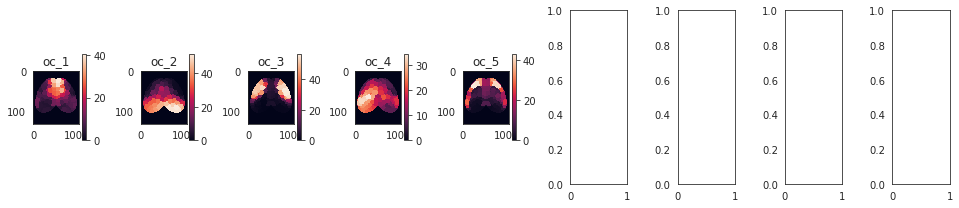

In [32]:
fig, axes = create_figure(1, k, (13.5, 3))

gam_arr = svinet.pi2arr(gam, cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)#, cmap=svinet.cmaps[idx])
    ax.set_title(f"oc_{idx}")
    plt.colorbar(im, ax=ax, shrink=0.5)
remove_ticks(axes)
plt.show()

In [38]:
pi_infer = gam.copy()
pi_infer /= pi_infer.sum(0, keepdims=True)

(0.0, 1.0)

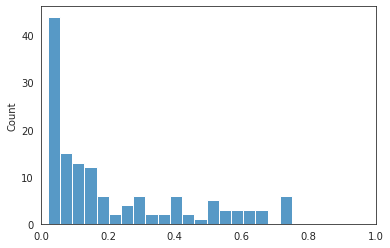

In [61]:
mem = np.round(pi_infer[1], decimals=2)
sns.histplot(mem[mem > 0], bins=20)
plt.xlim(0, 1)

In [85]:
p = 20
num_draws = 1000
rng = get_rng()

dlist = []
for k in tqdm([4, 5, 6, 7]):
    if k != 7:
        continue
    figs_dir = [
        mice.cfg.results_dir,
        'SVINET',
        'figs_combined',
        f"p{p}-k{k}",
    ]
    figs_dir = pjoin(*figs_dir)
    print(figs_dir)

    nrows, ncols = mice.cfg.num_subjects, 10
    fig, axes = create_figure(nrows, ncols, (2.33 * ncols, 2.0 * nrows), 'ticks', 'col', 'col')
 
    for sub in tqdm(mice.cfg.sub_ids, leave=False):
        samples = []
        for ses in tqdm(mice.cfg.ses_ids, leave=False):
            key = mice.get_key(sub, ses)

            svinet = SVINET(
                mice=mice,
                num_k=k,
                perc=p,
                key=key,
                mode=mode,
                metric=metric,
                match_metric=match_metric,
                match_using=match_using,
                graph_type='real',
                verbose=False,
            ).load_results(full_process=False)

            _df = svinet.pi_cut_df.drop(columns='run')
            intervals = _df.interval.unique()
            data = _df.percent.to_numpy().reshape(-1, k, len(intervals))
            data = data[:, list(perms[key].values()), :]
            s = np.zeros((num_draws, *data.shape[1:]))
            for i in range(data.shape[1]):
                for j in range(data.shape[2]):
                    s[:, i, j] = rng.choice(
                        a=data[:, i, j],
                        size=num_draws,
                        replace=True,
                    )
            samples.append(np.expand_dims(s, axis=0))
        samples = np.concatenate(samples)
        samples = samples.mean(0)
        
        for j in range(samples.shape[2]):
            intvl = intervals[j]
            dlist = []
            for i in range(samples.shape[1]):
                dlist.append({
                    'sub': [f"sub-SLC{sub:02d}"] * num_draws,
                    'interval': [intvl] * num_draws,
                    'oc_idx': [i + 1] * num_draws,
                    'k': [k] * num_draws,
                    'mean': samples[:, i, j],
                })

            sns.kdeplot(
                data=pd.DataFrame(merge_dicts(dlist)),
                x='mean',
                hue='oc_idx',
                fill=True,
                alpha=0.05,
                lw=1,
                palette=svinet.colors,
                ax=axes[sub - 1, j],
            )
            if sub - 1 == 0:
                axes[sub - 1, j].set_title(f"bin: {intvl}\n", fontsize=15)
            if j == 0:
                axes[sub - 1, j].set_ylabel(f"{mice.get_key(sub)}\n", fontsize=15)
            else:
                axes[sub - 1, j].set_ylabel('')

    fig.savefig(pjoin(figs_dir, f"kde-animals-means_bins{len(intervals)}.pdf"), bbox_inches='tight')
    # for dpi in [20, 30, 50]:
    #     fig.savefig(pjoin(figs_dir, f"kde-animals-means_bins{len(intervals)}_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
    plt.close()

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/p20-k7

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

<matplotlib.lines.Line2D object at 0x7f954e9273d0>

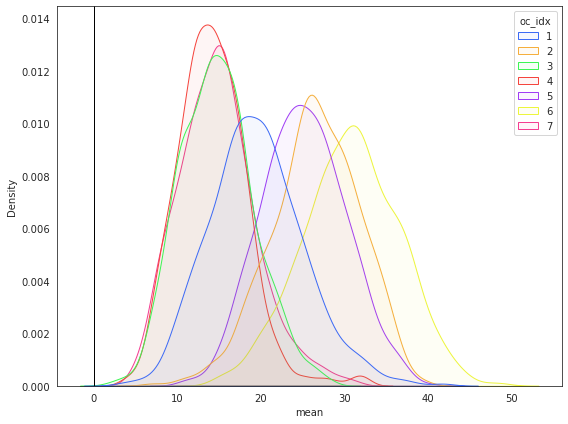

In [93]:
fig, ax = create_figure(1, 1, (8, 6))

_df = pd.DataFrame(merge_dicts(dlist))

sns.kdeplot(
    data=_df,
    x='mean',
    hue='oc_idx',
    fill=True,
    alpha=0.05,
    lw=1,
    palette=svinet.colors,
    ax=ax,
)
ax.axvline(0, color='k', lw=1)

In [94]:
props = {
    'boxprops': {'alpha': 0.5, 'edgecolor': 'k'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k'}
}
meanprops = {
    "marker": "o",
    "markerfacecolor": "bisque",
    "markeredgecolor": "k",
    "markersize": "8",
}

ax_tx = ax.twinx()
ax_tx.set_ylim(ax.get_ylim())
sns.boxplot(
    data=_df,
    x='mean',
    y='oc_idx',
    dodge=True,
    orient='h',
    width=0.6,
    whis=[2.5, 97.5],
    palette=svinet.colors,
    showmeans=True,
    meanprops=meanprops,
    ax=ax_tx,
    **props,
)

<AxesSubplot:label='56849b4d-9c1e-44c7-abb2-f0bb9a43d8fb', xlabel='mean', ylabel='oc_idx'>

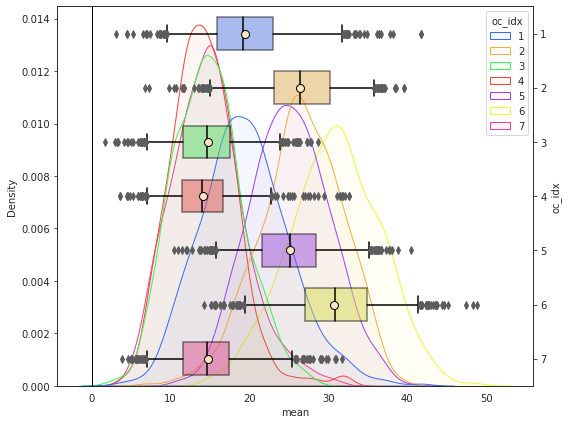

In [95]:
fig

In [12]:
props = {
    'boxprops': {'alpha': 0.5, 'edgecolor': 'k'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k'}
}
meanprops = {
    "marker": "o",
    "markerfacecolor": "bisque",
    "markeredgecolor": "k",
    "markersize": "8",
}

p = 20
num_draws = 10000
rng = get_rng()

dlist = []
for k in tqdm([4, 5, 6, 7, 8, 9]):
    if k != 9:
        continue
    figs_dir = [
        mice.cfg.results_dir,
        'SVINET',
        'figs_combined',
        f"p{p}-k{k}",
    ]
    figs_dir = pjoin(*figs_dir)
    print(figs_dir)

    nrows, ncols = mice.cfg.num_subjects, len(intervals)
    fig, axes = create_figure(nrows, ncols, (3.8 * ncols, 3.0 * nrows), 'ticks', 'col', 'col')
 
    for sub in tqdm(mice.cfg.sub_ids, leave=False):
        samples = []
        for ses in tqdm(mice.cfg.ses_ids, leave=False):
            key = mice.get_key(sub, ses)

            svinet = SVINET(
                mice=mice,
                num_k=k,
                perc=p,
                key=key,
                mode=mode,
                metric=metric,
                match_metric=match_metric,
                match_using=match_using,
                graph_type='real',
                verbose=False,
            ).load_results(full_process=False)

            _df = svinet.pi_cut_df.drop(columns='run')
            intervals = _df.interval.unique()
            data = _df.percent.to_numpy().reshape(-1, k, len(intervals))
            data = data[:, list(perms[key].values()), :]
            s = np.zeros((num_draws, *data.shape[1:]))
            for i in range(data.shape[1]):
                for j in range(data.shape[2]):
                    s[:, i, j] = rng.choice(
                        a=data[:, i, j],
                        size=num_draws,
                        replace=True,
                    )
            samples.append(np.expand_dims(s, axis=0))
        samples = np.concatenate(samples)
        samples = samples.mean(0)
        
        for j in range(samples.shape[2]):
            intvl = intervals[j]
            dlist = []
            for i in range(samples.shape[1]):
                dlist.append({
                    'sub': [f"sub-SLC{sub:02d}"] * num_draws,
                    'interval': [intvl] * num_draws,
                    'oc_idx': [i + 1] * num_draws,
                    'k': [k] * num_draws,
                    'mean': samples[:, i, j],
                })

            _df2 = pd.DataFrame(merge_dicts(dlist))
            sns.kdeplot(
                data=_df2,
                x='mean',
                hue='oc_idx',
                fill=True,
                alpha=0.05,
                lw=1,
                palette=svinet.colors,
                ax=axes[sub - 1, j],
            )
               
            ax_tx = axes[sub - 1, j].twinx()
            ax_tx.set_ylim(axes[sub - 1, j].get_ylim())
            sns.boxplot(
                data=_df2,
                x='mean',
                y='oc_idx',
                dodge=True,
                orient='h',
                width=0.6,
                whis=[2.5, 97.5],
                palette=svinet.colors,
                showmeans=True,
                meanprops=meanprops,
                ax=ax_tx,
                **props,
            )
            ax_tx.set_ylabel('')
            
            axes[sub - 1, j].axvline(0, color='k', lw=1)
            if sub - 1 == 0:
                axes[sub - 1, j].set_title(f"bin: {intvl}\n", fontsize=15)
            if j == 0:
                axes[sub - 1, j].set_ylabel(f"{mice.get_key(sub)}\n", fontsize=15)
            else:
                axes[sub - 1, j].set_ylabel('')

    fig.savefig(pjoin(figs_dir, f"kde-box-animals-means_bins{len(intervals)}.pdf"), bbox_inches='tight')
    for dpi in [20, 30, 50]:
        fig.savefig(pjoin(figs_dir, f"kde-animals-means_bins{len(intervals)}_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
    plt.close()

  0%|          | 0/6 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/p20-k9

NameError: name 'intervals' is not defined

In [97]:
props = {
    'boxprops': {'alpha': 0.5, 'edgecolor': 'k'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k'}
}
meanprops = {
    "marker": "o",
    "markerfacecolor": "bisque",
    "markeredgecolor": "k",
    "markersize": "8",
}

p = 20
num_draws = 10000
rng = get_rng()

dlist = []
for k in tqdm([4, 5, 6, 7]):
    if k != 7:
        continue
    figs_dir = [
        mice.cfg.results_dir,
        'SVINET',
        'figs_combined',
        f"p{p}-k{k}",
    ]
    figs_dir = pjoin(*figs_dir)
    print(figs_dir)

    nrows, ncols = mice.cfg.num_subjects, len(intervals)
    fig, axes = create_figure(nrows, ncols, (3.8 * ncols, 3.0 * nrows), 'ticks', 'col', 'col')
 
    for sub in tqdm(mice.cfg.sub_ids, leave=False):
        samples = []
        for ses in tqdm(mice.cfg.ses_ids, leave=False):
            key = mice.get_key(sub, ses)

            svinet = SVINET(
                mice=mice,
                num_k=k,
                perc=p,
                key=key,
                mode=mode,
                metric=metric,
                match_metric=match_metric,
                match_using=match_using,
                graph_type='real',
                verbose=False,
            ).load_results(full_process=False)

            _df = svinet.pi_cut_df.drop(columns='run')
            intervals = _df.interval.unique()
            data = _df.percent.to_numpy().reshape(-1, k, len(intervals))
            data = data[:, list(perms[key].values()), :]
            s = np.zeros((num_draws, *data.shape[1:]))
            for i in range(data.shape[1]):
                for j in range(data.shape[2]):
                    s[:, i, j] = rng.choice(
                        a=data[:, i, j],
                        size=num_draws,
                        replace=True,
                    )
            samples.append(np.expand_dims(s, axis=0))
        samples = np.concatenate(samples)
        samples = samples.mean(0)
        
        for j in range(samples.shape[2]):
            intvl = intervals[j]
            dlist = []
            for i in range(samples.shape[1]):
                dlist.append({
                    'sub': [f"sub-SLC{sub:02d}"] * num_draws,
                    'interval': [intvl] * num_draws,
                    'oc_idx': [i + 1] * num_draws,
                    'k': [k] * num_draws,
                    'mean': samples[:, i, j],
                })

            _df2 = pd.DataFrame(merge_dicts(dlist))
            sns.kdeplot(
                data=_df2,
                x='mean',
                fill=False,
                # alpha=0.05,
                lw=2,
                # palette=svinet.colors,
                ax=axes[sub - 1, j],
            )
               
            ax_tx = axes[sub - 1, j].twinx()
            ax_tx.set_ylim(axes[sub - 1, j].get_ylim())
            sns.boxplot(
                data=_df2,
                x='mean',
                dodge=True,
                orient='h',
                width=0.2,
                whis=[2.5, 97.5],
                # palette=svinet.colors,
                showmeans=True,
                meanprops=meanprops,
                ax=ax_tx,
                **props,
            )
            ax_tx.set_ylabel('')
            
            axes[sub - 1, j].axvline(0, color='k', lw=1)
            if sub - 1 == 0:
                axes[sub - 1, j].set_title(f"bin: {intvl}\n", fontsize=15)
            if j == 0:
                axes[sub - 1, j].set_ylabel(f"{mice.get_key(sub)}\n", fontsize=15)
            else:
                axes[sub - 1, j].set_ylabel('')

    fig.savefig(pjoin(figs_dir, f"kde-box-animals-means_ocs-combined_bins{len(intervals)}.pdf"), bbox_inches='tight')
    for dpi in [20, 30, 50]:
        fig.savefig(pjoin(figs_dir, f"kde-animals-means_ocs-combined_bins{len(intervals)}_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
    plt.close()

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/p20-k7

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

## All animals and sessions

In [12]:
p = 20
num_draws = 10000
rng = get_rng()

dlist = []
for k in tqdm([4, 5, 6, 7, 8, 9]):
    if k != 4:
        continue
    for sub in tqdm(mice.cfg.sub_ids, leave=False):
        samples = []
        for ses in tqdm(mice.cfg.ses_ids, leave=False):
            key = mice.get_key(sub, ses)

            svinet = SVINET(
                mice=mice,
                num_k=k,
                perc=p,
                key=key,
                mode=mode,
                metric=metric,
                match_metric=match_metric,
                match_using=match_using,
                graph_type='real',
                verbose=False,
            ).load_results(full_process=False)

            _df = svinet.pi_cut_df.drop(columns='run')
            intervals = _df.interval.unique()
            data = _df.percent.to_numpy().reshape(-1, k, len(intervals))
            data = data[:, list(perms[key].values()), :]
            s = np.zeros((num_draws, *data.shape[1:]))
            for i in range(data.shape[1]):
                for j in range(data.shape[2]):
                    s[:, i, j] = rng.choice(
                        a=data[:, i, j],
                        size=num_draws,
                        replace=True,
                    )
            samples.append(np.expand_dims(s, axis=0))
        samples = np.concatenate(samples)
        samples = samples.mean(0)
        
        for j in range(samples.shape[2]):
            for i in range(samples.shape[1]):
                dlist.append({
                    'sub': [f"sub-SLC{sub:02d}"] * num_draws,
                    'interval': [intervals[j]] * num_draws,
                    'oc_idx': [i + 1] * num_draws,
                    'k': [k] * num_draws,
                    'mean': samples[:, i, j],
                })
df_means = pd.DataFrame(merge_dicts(dlist))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
df_means

,sub,interval,oc_idx,k,mean
0,sub-SLC01,"(0.0, 0.1]",1,4,11.533770
1,sub-SLC01,"(0.0, 0.1]",1,4,17.788548
2,sub-SLC01,"(0.0, 0.1]",1,4,18.554899
3,sub-SLC01,"(0.0, 0.1]",1,4,16.448087
4,sub-SLC01,"(0.0, 0.1]",1,4,16.498898
...,...,...,...,...,...
3999995,sub-SLC10,"(0.9, 1.0]",4,4,41.683882
3999996,sub-SLC10,"(0.9, 1.0]",4,4,43.358396
3999997,sub-SLC10,"(0.9, 1.0]",4,4,36.023403
3999998,sub-SLC10,"(0.9, 1.0]",4,4,39.232568


/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/p20-k4

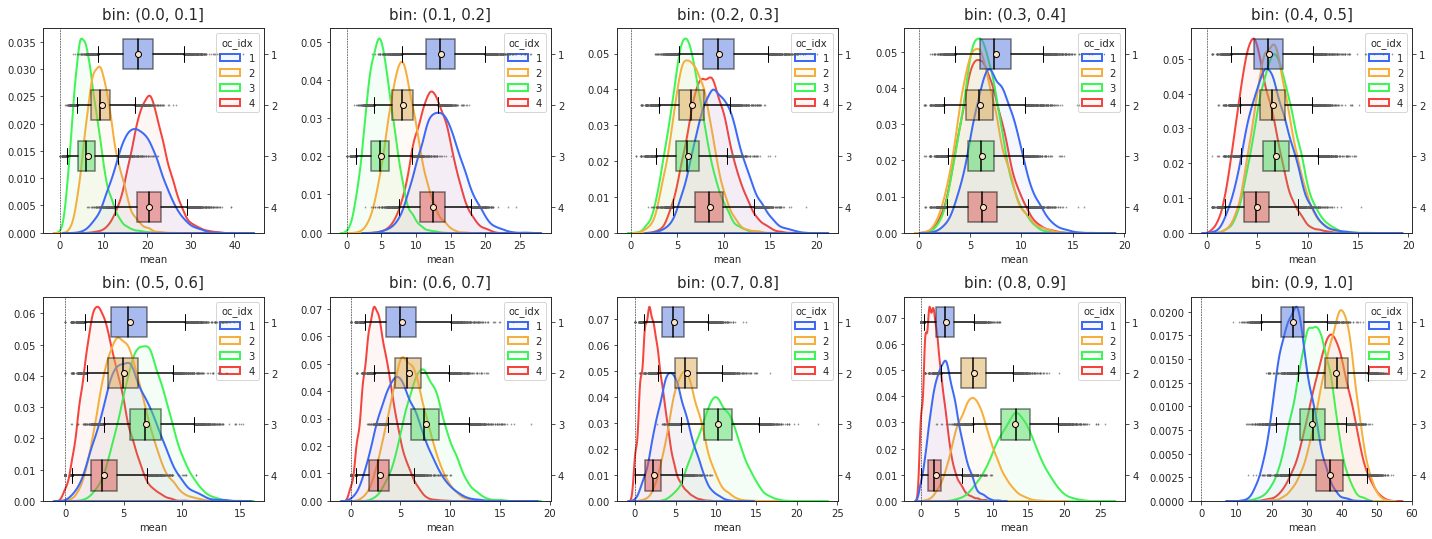

In [15]:
props = {
    'boxprops': {'alpha': 0.5, 'edgecolor': 'k'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k', 'linewidth': 1},
    'flierprops': {'alpha': 0.5, 'zorder': 1},
}
meanprops = {
    "marker": "o",
    "markerfacecolor": "bisque",
    "markeredgecolor": "k",
    "markersize": "6",
}
k = 4
figs_dir = [
    mice.cfg.results_dir,
    'SVINET',
    'figs_combined',
    f"p{p}-k{k}",
]
figs_dir = pjoin(*figs_dir)
print(figs_dir)

nrows = 2
ncols = int(np.ceil(len(intervals) / nrows))
fig, axes = create_figure(nrows, ncols, (4 * ncols, 3.8 * nrows), 'ticks', False, False)

for ax, intvl in zip(axes.ravel(), df_means.interval.unique()):
    _df = df_means.loc[
        (df_means.loc[:, 'sub'] == mice.get_key(sub)) &
        (df_means.loc[:, 'interval'] == intvl) &
        (df_means.loc[:, 'k'] == k)
    ]
    sns.kdeplot(
        data=_df,
        x='mean',
        hue='oc_idx',
        fill=True,
        alpha=0.05,
        lw=2,
        palette=svinet.colors,
        ax=ax,
    )
    ax_tx = ax.twinx()
    ax_tx.set_ylim(ax.get_ylim())
    sns.boxplot(
        data=_df,
        x='mean',
        y='oc_idx',
        palette=svinet.colors,
        dodge=True,
        orient='h',
        width=0.6,
        whis=[2.5, 97.5],
        fliersize=1,
        showmeans=True,
        meanprops=meanprops,
        ax=ax_tx,
        **props,
    )
    ax_tx.set_ylabel('')

    ax.axvline(0, color='k', lw=0.5, ls='--')
    
    ax.set_title(f"bin: {intvl}", y=1.02, fontsize=15)
    if j == 0:
        ax.set_ylabel('mice\n', fontsize=15)
    else:
        ax.set_ylabel('')

fig.savefig(pjoin(figs_dir, f"kde-box-animals-means_ses-combined_bins{len(intervals)}.pdf"), bbox_inches='tight')

In [16]:
props = {
    'boxprops': {'alpha': 0.5, 'edgecolor': 'k'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k', 'linewidth': 1},
    'flierprops': {'alpha': 0.5, 'zorder': 1},
}
meanprops = {
    "marker": "o",
    "markerfacecolor": "bisque",
    "markeredgecolor": "k",
    "markersize": "6",
}
k = 4
figs_dir = [
    mice.cfg.results_dir,
    'SVINET',
    'figs_combined',
    f"p{p}-k{k}",
]
figs_dir = pjoin(*figs_dir)
print(figs_dir)

whisk = {
    5.0: [2.5, 97.5],
    1.0: [0.5, 99.5],
    0.1: [0.05, 99.95],
}

figs = []
sups = []
for ci, whisk_val in whisk.items():
    nrows = 2
    ncols = len(intervals)
    fig, axes = create_figure(nrows, ncols, (4 * ncols, 3.8 * nrows), 'ticks', 'col', False)

    for j, intvl in enumerate(df_means.interval.unique()):
        _df = df_means.loc[
            (df_means.loc[:, 'sub'] == mice.get_key(sub)) &
            (df_means.loc[:, 'interval'] == intvl) &
            (df_means.loc[:, 'k'] == k)
        ]
        sns.kdeplot(
            data=_df,
            x='mean',
            hue='oc_idx',
            fill=True,
            alpha=0.05,
            lw=2,
            palette=svinet.colors,
            ax=axes[0, j],
        )
        axes[0, j].set_title(f"bin: {intvl}\n", fontsize=15)

        sns.boxplot(
            data=_df,
            x='mean',
            y='oc_idx',
            palette=svinet.colors,
            dodge=True,
            orient='h',
            width=0.6,
            whis=whisk_val,
            fliersize=1,
            showmeans=True,
            meanprops=meanprops,
            ax=axes[1, j],
            **props,
        )
        for i in range(2):
            axes[i, j].grid(axis='both', ls=':')
            axes[i, j].axvline(0, color='dimgrey', lw=0.8, ls='--')
        if j == 0:
            axes[0, j].set_ylabel('kde (mice)\n', fontsize=15)
            axes[1, j].set_ylabel('box (mice)\n', fontsize=15)
        else:
            for i in range(2):
                axes[i, j].set_ylabel('')

    msg = f"Results at group level.  Whiskers at {ci} % confidence interval (i.e. {whisk_val})"
    sup = fig.suptitle(msg, fontsize=20, y=1.07)
    figs.append(fig)
    sups.append(sup)
    plt.close()
# fig.savefig(pjoin(figs_dir, f"kde-box-group_bins{len(intervals)}.pdf"), bbox_inches='tight')

save_file = pjoin(figs_dir, f"kde-box-group_bins{len(intervals)}.pdf")
save_fig(
    fig=figs,
    sup=sups,
    save_file=save_file,
    display=False,
    multi=True,
)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/p20-k4

In [28]:
p = 20

dlist = []
for k in tqdm([4, 5, 6, 7]):
    if k != 5:
        continue
    for sub in tqdm(mice.cfg.sub_ids, leave=False):
        for ses in tqdm(mice.cfg.ses_ids, leave=False):
            key = mice.get_key(sub, ses)
            svinet = SVINET(
                mice=mice,
                num_k=k,
                perc=p,
                key=key,
                mode=mode,
                metric=metric,
                match_metric=match_metric,
                match_using=match_using,
                graph_type='real',
                verbose=False,
            ).load_results(full_process=False)

            _df = svinet.pi_cut_df.drop(columns='run')
            intervals = _df.interval.unique()
            data = _df.percent.to_numpy().reshape(-1, k, len(intervals))
            data = data[:, list(perms[key].values()), :]
            
            for i in range(data.shape[1]):
                for j in range(data.shape[2]):
                    alpha, loc, beta = sp_stats.gamma.fit(data[:, i, j], floc=-1e-10)
                    _result = {
                        'alpha': alpha,
                        'loc': loc,
                        'beta': beta,
                        'mean_est': alpha / beta,
                        'dispersion': 1 / alpha,
                        'mean': np.mean(data[:, i, j]),
                        'median': np.median(data[:, i, j]),
                        'median_w': np.nan,
                    }
                    dlist.append({
                        'param': _result.keys(),
                        'value': _result.values(),
                        'subject': [sub] * len(_result),
                        'session': [ses] * len(_result),
                        'interval': [intervals[j]] * len(_result),
                        'oc_idx': [i + 1] * len(_result),
                        'k': [k] * len(_result),
                    })
df_gamma = pd.DataFrame(merge_dicts(dlist))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
intervals = df_gamma.interval.unique()

In [30]:
for k in df_gamma.k.unique():
    for intvl in intervals:
        for sub in mice.cfg.sub_ids:
            median = np.zeros((3, k))
            disper = np.zeros((3, k))
            for ses in mice.cfg.ses_ids:
                _df = df_gamma.loc[
                    (df_gamma.k == k) &
                    (df_gamma.interval == intvl) &
                    (df_gamma.subject == sub) &
                    (df_gamma.session == ses)
                ]
                median[ses - 1] = _df.loc[_df.param == 'median', 'value'].values
                disper[ses - 1] = _df.loc[_df.param == 'dispersion', 'value'].values
            median_w = ((median * disper) / disper.sum(axis=0, keepdims=True)).sum(0)

            cond = (
                (df_gamma.subject == sub) &
                (df_gamma.interval == intvl) &
                (df_gamma.k == k) &
                (df_gamma.param == 'median_w')
            )
            df_gamma.loc[cond & (df_gamma.session == 1), 'value'] = median_w
            df_gamma.loc[cond, 'session'] = -1

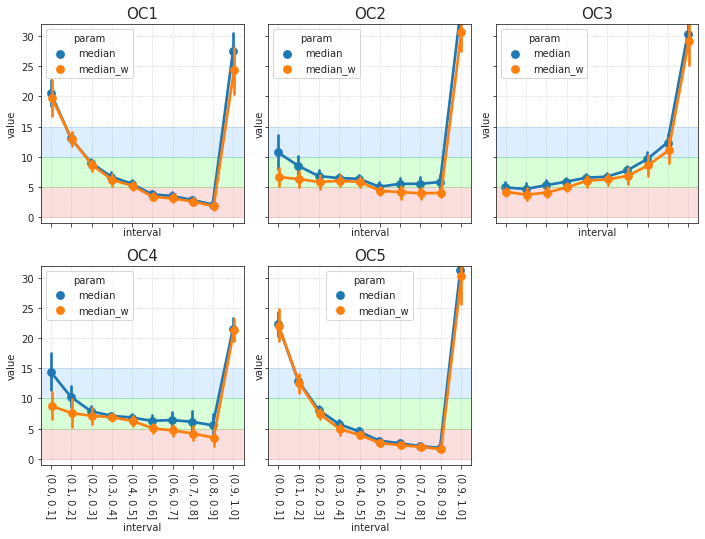

In [31]:
k = 5

nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (3.3 * ncols, 3.8 * nrows), 'ticks', 'all', 'all')

for ax, oc_idx in zip(axes.ravel(), range(1, k + 1)):
    _df = df_gamma.loc[
        (df_gamma.param.isin(['median', 'median_w'])) &
        (df_gamma.k == k) &
        (df_gamma.oc_idx == oc_idx)
    ]
    sns.pointplot(
        data=_df,
        x='interval',
        y='value',
        hue='param',
        dodge=True,
        lw=1,
        ax=ax,
    )
    ax.tick_params(axis='x', rotation=-90)
    ax.set_ylim([-1, ax.get_ylim()[1]])
    ax.grid(axis='both', ls=':')
    ax.set_title(f"OC{oc_idx}", fontsize=15)
    ax.axhspan(0, 5, color='lightcoral', alpha=0.25, zorder=1)
    ax.axhspan(5, 10, color='lime', alpha=0.15, zorder=1)
    ax.axhspan(10, 15, color='dodgerblue', alpha=0.15, zorder=1)
_ = trim_axs(axes, k)
plt.show()

In [32]:
13.5  /4

3.375

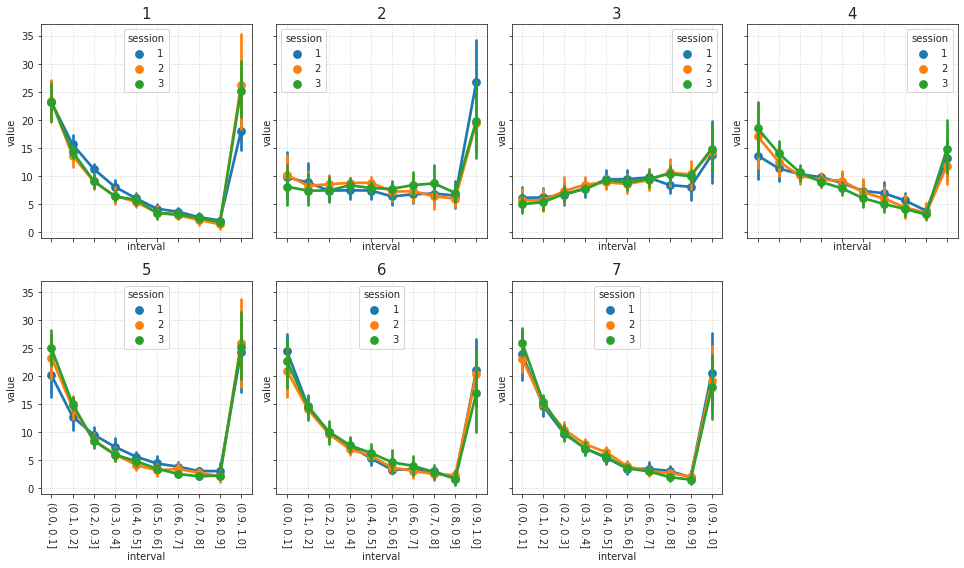

In [125]:
nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 4 * nrows), 'ticks', 'all', 'all')

for ax, oc_idx in zip(axes.ravel(), range(1, k + 1)):
    _df = df_gamma.loc[
        (df_gamma.param == 'median') &
        (df_gamma.oc_idx == oc_idx)
    ]
    sns.pointplot(
        data=_df,
        x='interval',
        y='value',
        hue='session',
        dodge=False,
        ax=ax,
    )
    ax.tick_params(axis='x', rotation=-90)
    ax.set_ylim([-1, ax.get_ylim()[1]])
    ax.grid(axis='both', ls=':')
    ax.set_title(oc_idx, fontsize=15)
_ = trim_axs(axes, k)
plt.show()

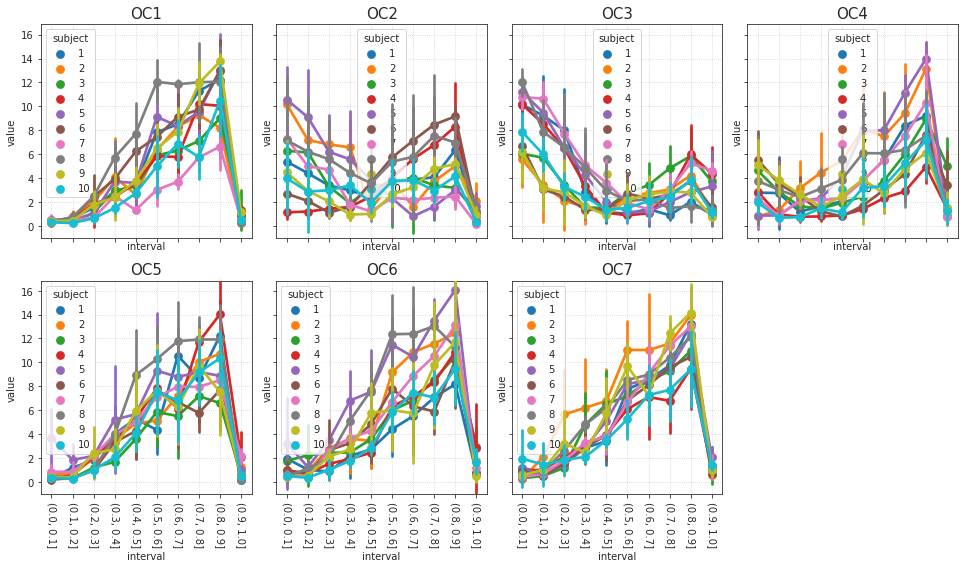

In [132]:
nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 4 * nrows), 'ticks', 'all', 'all')

for ax, oc_idx in zip(axes.ravel(), range(1, k + 1)):
    _df = df_gamma.loc[
        (df_gamma.param == 'dispersion') &
        (df_gamma.oc_idx == oc_idx)
    ]
    sns.pointplot(
        data=_df,
        x='interval',
        y='value',
        hue='subject',
        dodge=False,
        ci='sd',
        ax=ax,
    )
    ax.tick_params(axis='x', rotation=-90)
    ax.set_ylim([-1, ax.get_ylim()[1]])
    ax.grid(axis='both', ls=':')
    ax.set_title(f"OC{oc_idx}", fontsize=15)
_ = trim_axs(axes, k)
plt.show()

In [ ]:
k = 7
figs_dir = [
    mice.cfg.results_dir,
    'SVINET',
    'figs_combined',
    f"p{p}-k{k}",
]
figs_dir = pjoin(*figs_dir)

_df = df_means.loc[df_means.k == k]
subs = sorted(_df.loc[:, 'sub'].unique())
intervals = _df.interval.unique()

In [ ]:
nrows, ncols = len(subs), len(intervals)
fig, axes = create_figure(nrows, ncols, (2.9 * ncols, 2.5 * nrows), 'ticks', 'col', 'col')

for i, key in tqdm(enumerate(subs), total=len(subs)):
    for j, intvl in enumerate(intervals):
        _df = df_means.loc[
            (df_means.k == k) &
            (df_means.loc[:, 'sub'] == key) &
            (df_means.interval == intvl)
        ]
        sns.kdeplot(
            data=_df,
            x='mean',
            hue='oc_idx',
            fill=True,
            alpha=0.05,
            lw=1,
            palette=svinet.colors,
            ax=axes[i, j],
        )
        if i == 0:
            axes[i, j].set_title(f"bin: {intvl}\n", fontsize=15)
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n", fontsize=15)
        else:
            axes[i, j].set_ylabel('')

fig.savefig(pjoin(figs_dir, f"kde-animals-means.pdf"), bbox_inches='tight')
for dpi in [20, 30, 50]:
    fig.savefig(pjoin(figs_dir, f"kde-animals-means_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
plt.close()

In [ ]:
k = 5
figs_dir = [
    mice.cfg.results_dir,
    'SVINET',
    'figs_combined',
    f"p{p}-k{k}",
]
figs_dir = pjoin(*figs_dir)

_df = df_means.loc[df_means.k == k]
subs = sorted(_df.loc[:, 'sub'].unique())
intervals = _df.interval.unique()

In [ ]:
nrows, ncols = len(subs), len(intervals)
fig, axes = create_figure(nrows, ncols, (2.9 * ncols, 2.5 * nrows), 'ticks', 'col', 'col')

for i, key in tqdm(enumerate(subs), total=len(subs)):
    for j, intvl in enumerate(intervals):
        _df = df_means.loc[
            (df_means.k == k) &
            (df_means.loc[:, 'sub'] == key) &
            (df_means.interval == intvl)
        ]
        sns.kdeplot(
            data=_df,
            x='mean',
            hue='oc_idx',
            fill=True,
            alpha=0.05,
            lw=1,
            palette=svinet.colors,
            ax=axes[i, j],
        )
        if i == 0:
            axes[i, j].set_title(f"bin: {intvl}\n", fontsize=15)
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n", fontsize=15)
        else:
            axes[i, j].set_ylabel('')

fig.savefig(pjoin(figs_dir, f"kde-animals-means.pdf"), bbox_inches='tight')
for dpi in [20, 30, 50]:
    fig.savefig(pjoin(figs_dir, f"kde-animals-means_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
plt.close()

In [550]:
np.unique(_df.oc_idx.to_numpy().reshape(-1, 7, 20)[:, 5, :])

array([6])

In [557]:
np.unique(_df.interval.to_numpy().reshape(-1, 7, 20)[:, :, 6])

array([Interval(0.3, 0.35, closed='right')], dtype=object)

In [ ]:
pd.Series.to_numpy

In [482]:
num_draws = 1000
dlist = []
for k in tqdm(df.k.unique()):
    for intvl in df.interval.unique():
        for sub in mice.cfg.sub_ids:
            for oc_idx in range(1, k + 1):
                for ses in mice.cfg.ses_ids:
                    _df = df.loc[
                        (df.k == k) &
                        (df.oc_idx == oc_idx) &
                        (df.interval == intvl) &
                        (df.key == mice.get_key(sub, ses))
                    ]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [483]:
def fn(x):
    return x.loc[
        (x.k == k) &
        (x.oc_idx == oc_idx) &
        (x.interval == intvl) &
        (x.key == mice.get_key(sub, ses))
    ]

In [484]:
%timeit fn(df)

382 ms ± 5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [486]:
ctr = 0
for k in tqdm(df.k.unique()):
    for intvl in df.interval.unique():
        for sub in mice.cfg.sub_ids:
            for oc_idx in range(1, k + 1):
                for ses in mice.cfg.ses_ids:
                    ctr += 1

  0%|          | 0/4 [00:00<?, ?it/s]

In [489]:
ctr * 382e-3 / 3600

1.4006666666666665

In [476]:
df.oc_idx.unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [471]:
k = 7
intvl = intervals[0]
sub = 7

oc_idx = 1

num_draws = 1000000
samples = np.zeros((3, num_draws))
for ses in mice.cfg.ses_ids:
    _key = mice.get_key(sub, ses)
    _df = df.loc[
        (df.k == k) &
        (df.key == _key) &
        (df.oc_idx == oc_idx) &
        (df.interval == intvl)
    ]
    samples[ses-1] = rng.choice(_df.percent.tolist(), size=num_draws, replace=True) 

In [472]:
samples.shape

(3, 1000000)

<AxesSubplot:ylabel='Count'>

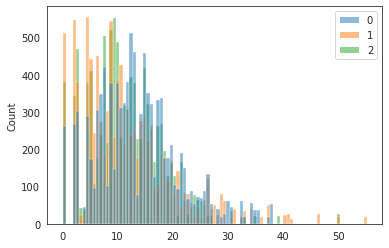

In [468]:
sns.histplot(samples.T, alpha=0.5)

<AxesSubplot:ylabel='Density'>

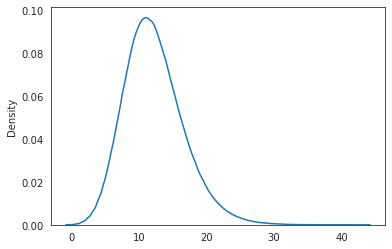

In [474]:
sample_mean = samples.mean(0)
sns.kdeplot(sample_mean)

## Generate KDE figs

In [191]:
k = 7
figs_dir = [
    mice.cfg.results_dir,
    'SVINET',
    'figs_combined',
    f"p{p}-k{k}",
]
figs_dir = pjoin(*figs_dir)

In [192]:
figs_dir

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/p20-k7'

In [193]:
keys = sorted(df.key.unique())
intervals = df.interval.unique()

In [194]:
nrows, ncols = len(keys), len(intervals)
fig, axes = create_figure(nrows, ncols, (5 * ncols, 4.4 * nrows), 'ticks', 'col', 'col')

for i, key in tqdm(enumerate(keys), total=len(keys)):
    for j, intvl in enumerate(intervals):
        _df = df.loc[
            (df.k == k) &
            (df.key == key) &
            (df.interval == intvl)
        ]
        sns.kdeplot(
            data=_df,
            x='percent',
            hue='oc_idx',
            fill=True,
            alpha=0.05,
            lw=1,
            palette=svinet.colors,
            ax=axes[i, j],
        )
        if i == 0:
            axes[i, j].set_title(f"bin: {intvl}\n", fontsize=20)
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n", fontsize=20)
        else:
            axes[i, j].set_ylabel('')

fig.savefig(pjoin(figs_dir, f"kde-all.pdf"), bbox_inches='tight')
for dpi in [10, 30, 50]:
    fig.savefig(pjoin(figs_dir, f"kde-all_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
plt.close()

  0%|          | 0/30 [00:00<?, ?it/s]

In [195]:
nrows, ncols = len(keys), len(intervals)
fig, axes = create_figure(nrows, ncols, (5 * ncols, 4.4 * nrows), 'ticks', 'col', 'col')

for i, key in tqdm(enumerate(keys), total=len(keys)):
    for j, intvl in enumerate(intervals):
        _df = df.loc[
            (df.k == k) &
            (df.key == key) &
            (df.interval == intvl)
        ]
        sns.kdeplot(
            data=_df,
            x='percent',
            fill=True,
            alpha=0.5,
            lw=2,
            ax=axes[i, j],
        )
        if i == 0:
            axes[i, j].set_title(f"bin: {intvl}\n", fontsize=20)
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n", fontsize=20)
        else:
            axes[i, j].set_ylabel('')

fig.savefig(pjoin(figs_dir, f"kde-all_oc-combined.pdf"), bbox_inches='tight')
for dpi in [10, 30, 50]:
    fig.savefig(pjoin(figs_dir, f"kde-all_oc-combined_dpi{dpi}.png"), bbox_inches='tight', dpi=dpi)
plt.close()

  0%|          | 0/30 [00:00<?, ?it/s]

In [196]:
nrows = 4
ncols = int(np.ceil(len(intervals) / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 11), 'ticks')

for idx, (ax, intvl) in enumerate(zip(axes.ravel(), intervals)):
    sns.kdeplot(
        data=df.loc[(df.k == k) & (df.interval == intvl)],
        x='percent',
        fill=True,
        alpha=0.05,
        hue='oc_idx',
        lw=1,
        palette=svinet.colors,
        ax=ax,
    )
    ax.set_title(f"bin: {intvl}", fontsize=15)
    if idx % ncols == 0:
        ax.set_ylabel(f"density", fontsize=15)
    else:
        ax.set_ylabel('')
fig.savefig(pjoin(figs_dir, f"kde_animals-combined.pdf"), bbox_inches='tight')
plt.close()

In [197]:
nrows = 4
ncols = int(np.ceil(len(intervals) / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 11), 'ticks')

for idx, (ax, intvl) in enumerate(zip(axes.ravel(), intervals)):
    sns.kdeplot(
        data=df.loc[(df.k == k) & (df.interval == intvl)],
        x='percent',
        fill=True,
        alpha=0.5,
        lw=2,
        palette=svinet.colors,
        ax=ax,
    )
    ax.set_title(f"bin: {intvl}", fontsize=15)
    if idx % ncols == 0:
        ax.set_ylabel(f"density", fontsize=15)
    else:
        ax.set_ylabel('')
fig.savefig(pjoin(figs_dir, f"kde_animals-combined_ocs-combined.pdf"), bbox_inches='tight')
plt.close()

In [198]:
nrows = k
ncols = len(intervals)
fig, axes = create_figure(nrows, ncols, (ncols * 3, nrows * 2.5 ), 'ticks', 'col', False)

for i in range(nrows):
    for j, intvl in enumerate(intervals):
        _df = df.loc[
            (df.k == k) & 
            (df.oc_idx == i +1 ) &
            (df.interval == intvl)
        ]
        sns.kdeplot(
            data=_df,
            x='percent',
            fill=True,
            alpha=0.5,
            lw=2,
            color=svinet.colors[i + 1],
            ax=axes[i, j],
        )
        _mean = _df.percent.mean()
        _median = _df.percent.median()
        axes[i, j].axvline(_mean, ls=':', color='k', label=f"mean: {_mean:.1f}", lw=1.1)
        axes[i, j].axvline(_median, ls='--', color='k', label=f"median: {_median:.1f}", lw=0.8)
        axes[i, j].legend(loc='upper right', fontsize=8)
        
        if i == 0:
            axes[i, j].set_title(f"bin: {intvl}\n", fontsize=15)
        if j == 0:
            axes[i, j].set_ylabel(f"density\n", fontsize=15)
        else:
            axes[i, j].set_ylabel('')
fig.savefig(pjoin(figs_dir, f"kde_animals-combined_ocs-rows.pdf"), bbox_inches='tight')
plt.close()

In [199]:
nrows = k
ncols = len(intervals)
fig, axes = create_figure(nrows, ncols, (ncols * 3, nrows * 2.5 ), 'ticks', 'all', 'all')

for i in range(nrows):
    for j, intvl in enumerate(intervals):
        _df = df.loc[
            (df.k == k) & 
            (df.oc_idx == i +1 ) &
            (df.interval == intvl)
        ]
        sns.kdeplot(
            data=_df,
            x='percent',
            fill=True,
            alpha=0.5,
            lw=2,
            color=svinet.colors[i + 1],
            ax=axes[i, j],
        )
        _mean = _df.percent.mean()
        _median = _df.percent.median()
        axes[i, j].axvline(_mean, ls=':', color='k', label=f"mean: {_mean:.1f}", lw=1.1)
        axes[i, j].axvline(_median, ls='--', color='k', label=f"median: {_median:.1f}", lw=0.8)
        axes[i, j].legend(loc='upper right', fontsize=8)
        
        if i == 0:
            axes[i, j].set_title(f"bin: {intvl}\n", fontsize=15)
        if j == 0:
            axes[i, j].set_ylabel(f"density\n", fontsize=15)
        else:
            axes[i, j].set_ylabel('')
fig.savefig(pjoin(figs_dir, f"kde_animals-combined_ocs-rows_xy-shared.pdf"), bbox_inches='tight')
plt.close()

## END generate KDE figs

In [12]:
figs = []
sups = []
for kind in ['bar', 'box', 'box-strip']:
    output = svinet.plot_memberships(kind, show=False, save=False)
    figs.append(output['fig'])
    sups.append(output['sup'])

In [31]:
aaa = ['a', 'b']
pjoin(*aaa)

'a/b'

In [57]:
q = 0
q %= 1
q

0

In [58]:
not 0 < q < 1

True

<seaborn.axisgrid.FacetGrid object at 0x7f216268a580>

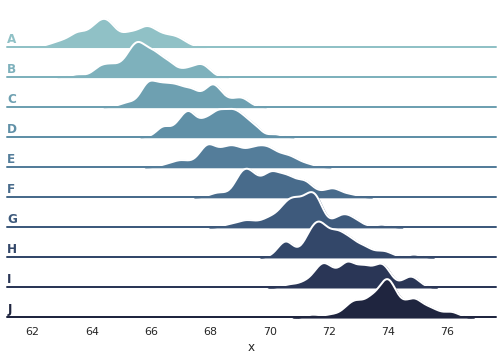

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [60]:
df

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


,run,oc_idx,count,percent,interval
0,n137-k5-mmsb-seed2-linksampling-p20,1,1,2.040816,"(0.0, 0.05]"
1,n137-k5-mmsb-seed2-linksampling-p20,1,4,8.163265,"(0.05, 0.1]"
2,n137-k5-mmsb-seed2-linksampling-p20,1,3,6.122449,"(0.1, 0.15]"
3,n137-k5-mmsb-seed2-linksampling-p20,1,5,10.204082,"(0.15, 0.2]"
4,n137-k5-mmsb-seed2-linksampling-p20,1,7,14.285714,"(0.2, 0.25]"
...,...,...,...,...,...
49995,n137-k5-mmsb-seed997-linksampling-p20,5,1,2.083333,"(0.75, 0.8]"
49996,n137-k5-mmsb-seed997-linksampling-p20,5,3,6.250000,"(0.8, 0.85]"
49997,n137-k5-mmsb-seed997-linksampling-p20,5,0,0.000000,"(0.85, 0.9]"
49998,n137-k5-mmsb-seed997-linksampling-p20,5,2,4.166667,"(0.9, 0.95]"


<seaborn.axisgrid.FacetGrid object at 0x7f216268a790>

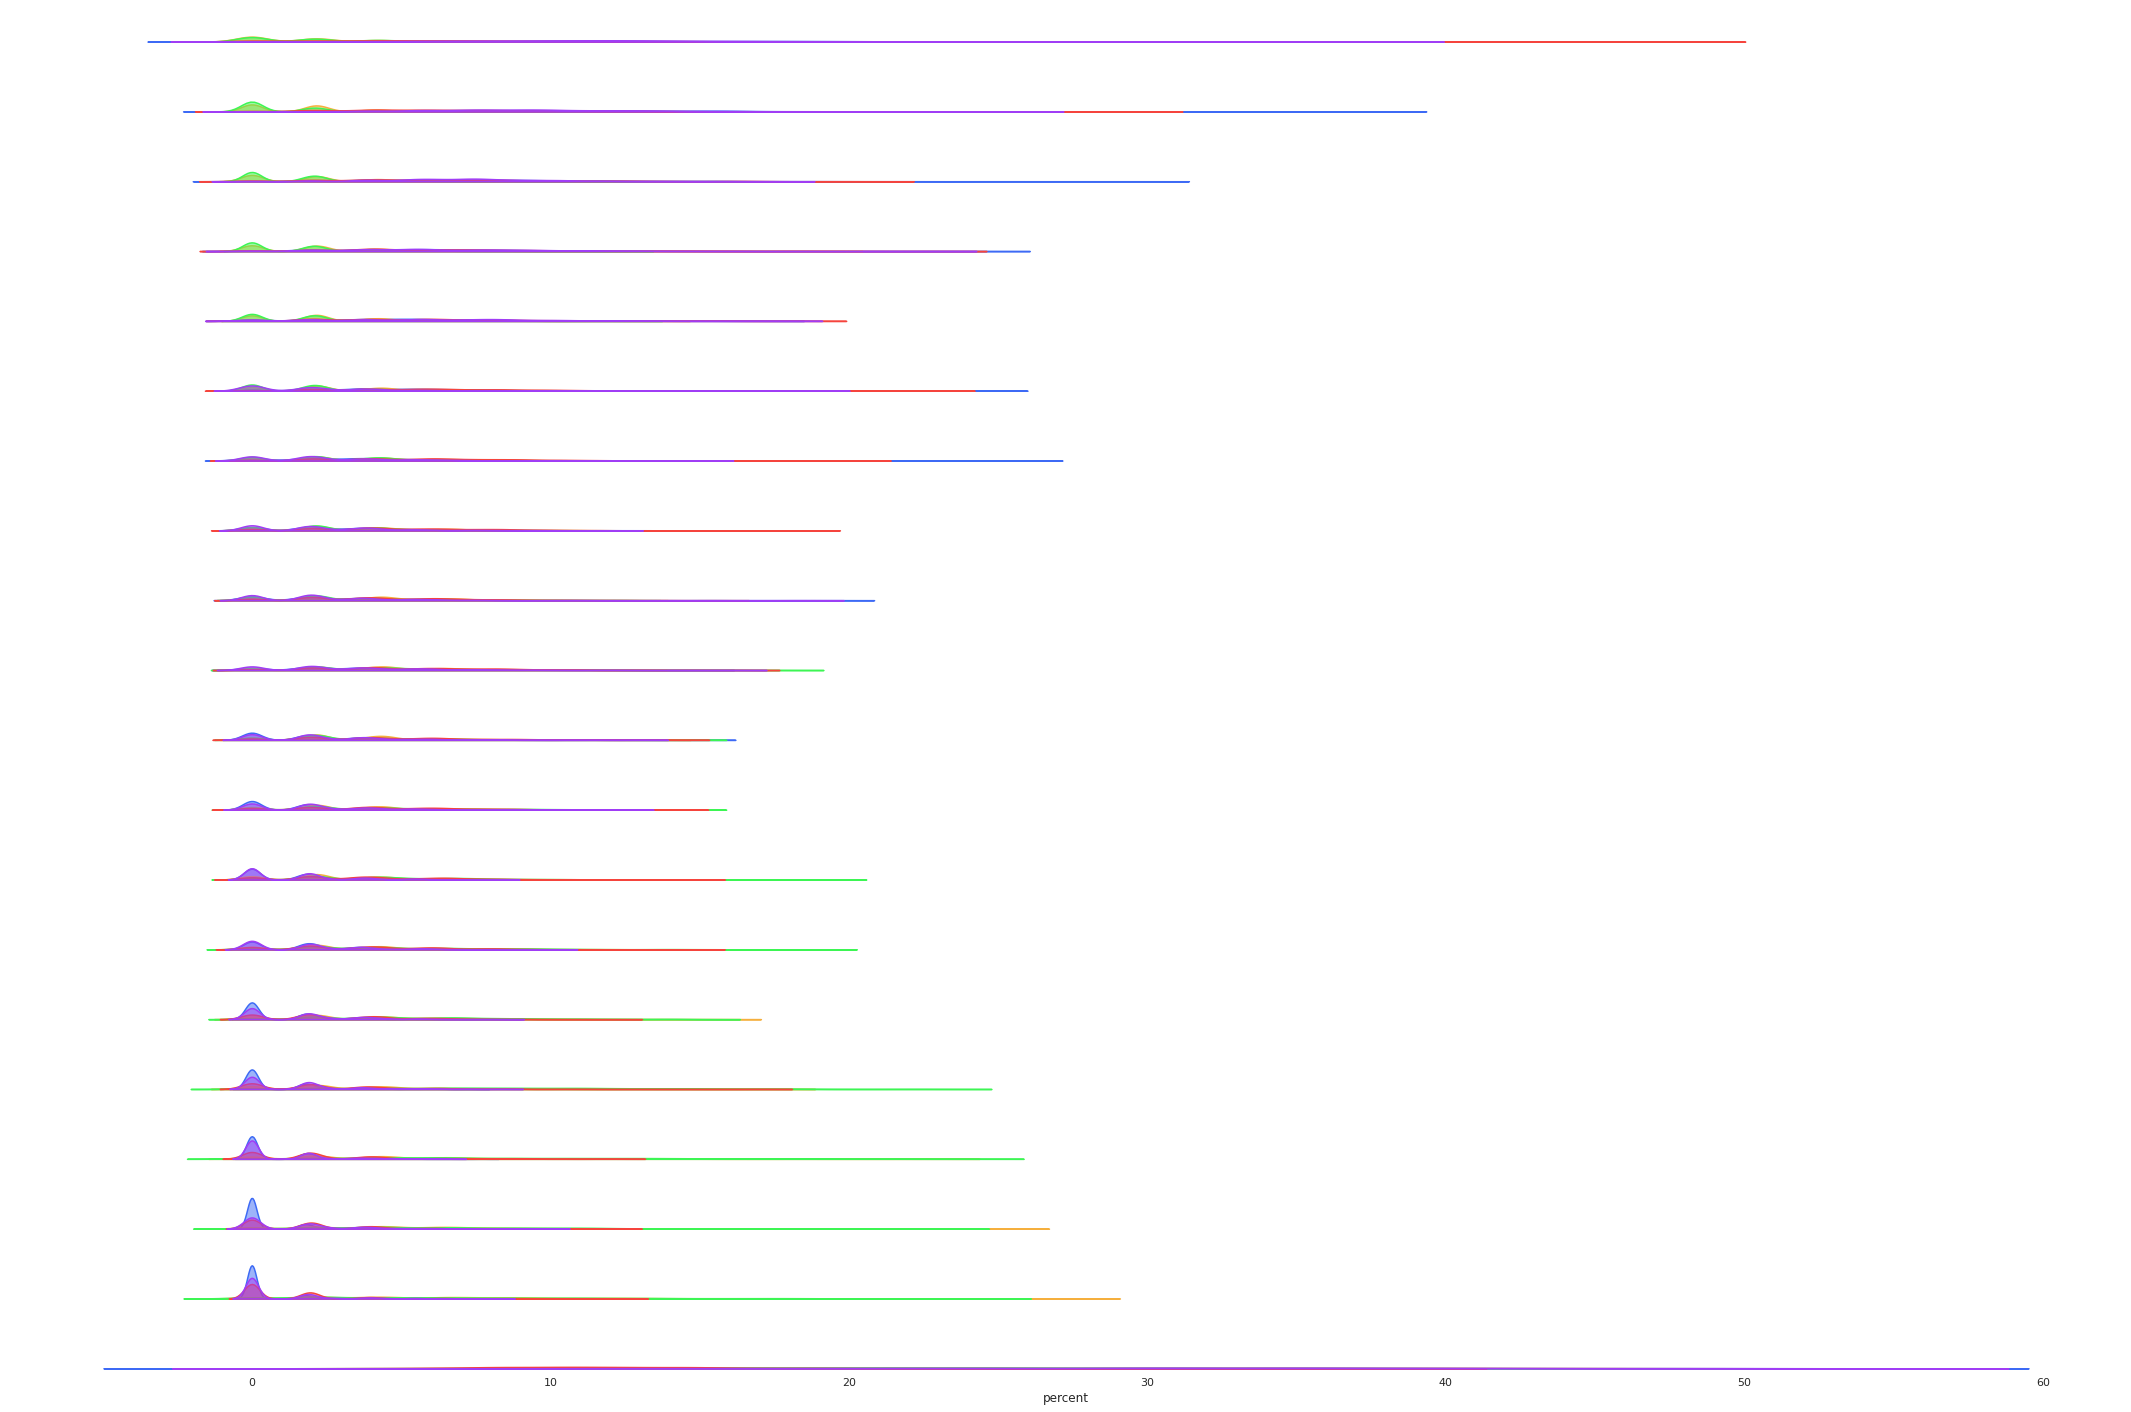

In [85]:
df = svinet.pi_cut_df.copy()
g = sns.FacetGrid(df, row="interval", hue="oc_idx", aspect=30, height=1, palette=svinet.colors)

# Draw the densities in a few steps
g.map(sns.kdeplot, "percent",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5)
# g.map(sns.kdeplot, "percent", clip_on=False, color="w", lw=2, bw_adjust=.5)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

# g.map(label, "percent")

# Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [13]:
save_fig(figs, sups, pjoin(tmp_dir, 'test.pdf'), display=False, multi=True)

In [15]:
mice.cfg.results_dir

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results'

In [23]:
name = [
    f"{svinet.mode}",
    f"{svinet.metric}",
    f"task-{svinet.task}",
    f"n{svinet.mice.parcel.results['n_cortical_regions']}",
]
name = f"figs:{'_'.join(name)}"
name

'figs:bold_pearson_task-rest_n128'

In [21]:
pjoin(mice.cfg.results_dir, 'SVINET', 'figs_all')

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_all'

In [18]:
os.listdir(pjoin(mice.cfg.results_dir, 'SVINET'))

[
    'bold_pearson_task-rest_sub-SLC02_ses-2_n128',
    'bold_pearson_task-rest_sub-SLC05_ses-1_n128',
    'bold_pearson_task-rest_sub-SLC01_ses-1_n128',
    'bold_pearson_task-rest_sub-SLC03_ses-1_n128',
    'bold_pearson_task-rest_sub-SLC01_ses-3_n128',
    'bold_pearson_task-rest_sub-SLC02_ses-1_n128',
    'bold_spearman_sub-SLC07_n128',
    'bold_pearson_task-rest_sub-SLC07_n128',
    'bold_spearman_sub-SLC_n128',
    'bold_pearson_task-rest_sub-SLC07_ses-2_n128',
    'bold_spearman_sub-SLC01_n128',
    'bold_pearson_task-rest_sub-SLC07_ses-3_n128',
    'bold_pearson_task-rest_sub-SLC01_ses-2_n128',
    'bold_pearson_task-rest_sub-SLC02_ses-3_n128',
    'bold_pearson_task-rest_sub-SLC07_ses-1_n128',
    'bold_spearman_sub-SLC02_n128',
    'bold_spearman_sub-SLC06_n128',
    'bold_pearson_task-rest_sub-SLC03_ses-2_n128'
]

'bold_pearson_task-rest_n128'

In [9]:
def save_fig(fig, sup, save_file, display, multi=False):
    if save_file is not None:
        save_dir = os.path.dirname(save_file)
        try:
            os.makedirs(save_dir, exist_ok=True)
        except FileNotFoundError:
            pass
        if not multi:
            fig.savefig(save_file, dpi=fig.dpi, bbox_inches='tight', bbox_extra_artists=[sup])
        else:
            assert len(fig) == len(sup) > 1, "must provide > 1 figs for multi saving"
            with PdfPages(save_file) as pages:
                for f, s in zip(fig, sup):
                    if f is None:
                        continue
                    canvas = FigureCanvasPdf(f)
                    if s is not None:
                        canvas.print_figure(pages, dpi=f.dpi, bbox_inches='tight', bbox_extra_artists=[s])
                    else:
                        canvas.print_figure(pages, dpi=f.dpi, bbox_inches='tight')
    if display:
        if isinstance(fig, list):
            for f in fig:
                plt.show(f)
        else:
            plt.show(fig)
    else:
        if isinstance(fig, list):
            for f in fig:
                plt.close(f)
        else:
            plt.close(fig)


In [10]:
wind=5

dlist = []
for run_name, run in svinet.get_result_dict().items():
    for k in ['nll', 'nll_sparse', 'nll_link', 'nll_nonlink']:
        x = run['valid'][k][-wind:]
        dlist.append({
            'run_name': [run_name] * len(x),
            'iter': range(len(x)),
            'label': [k] * len(x),
            'values': x,
        })
df = pd.DataFrame(merge_dicts(dlist))

<AxesSubplot:xlabel='iter', ylabel='values'>

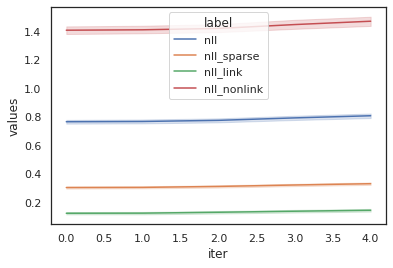

In [11]:
sns.lineplot(
    data=df,
    x='iter',
    y='values',
    hue='label',
)

In [15]:
median = df.loc[df.label == 'nll', 'values'].median()

<matplotlib.lines.Line2D object at 0x7f9f81f3c7c0>

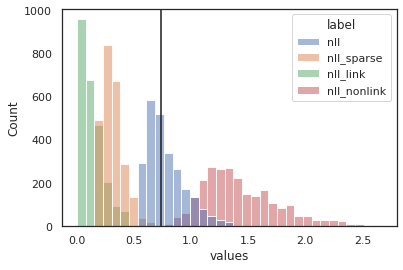

In [17]:
sns.histplot(data=df, x='values', hue='label')
plt.axvline(median, color='k')

In [ ]:
nll

In [7]:
_ = svinet.plot_memberships('bar', show=False, save=True)
_ = svinet.plot_memberships('box', show=False, save=True)
_ = svinet.plot_memberships('box-strip', show=False, save=True, size=5, alpha=0.1)

In [9]:
bins = []
n_cuts = len(svinet.pi_cut_df) / len(svinet.get_result_dict()) / svinet.num_k
intervals = svinet.pi_cut_df.iloc[:int(n_cuts)].loc[:, 'interval']
for intvl in intervals:
    bins.append(intvl.left)
    bins.append(intvl.right)
bins = np.unique(bins)

In [11]:
df = svinet.pi_cut_df

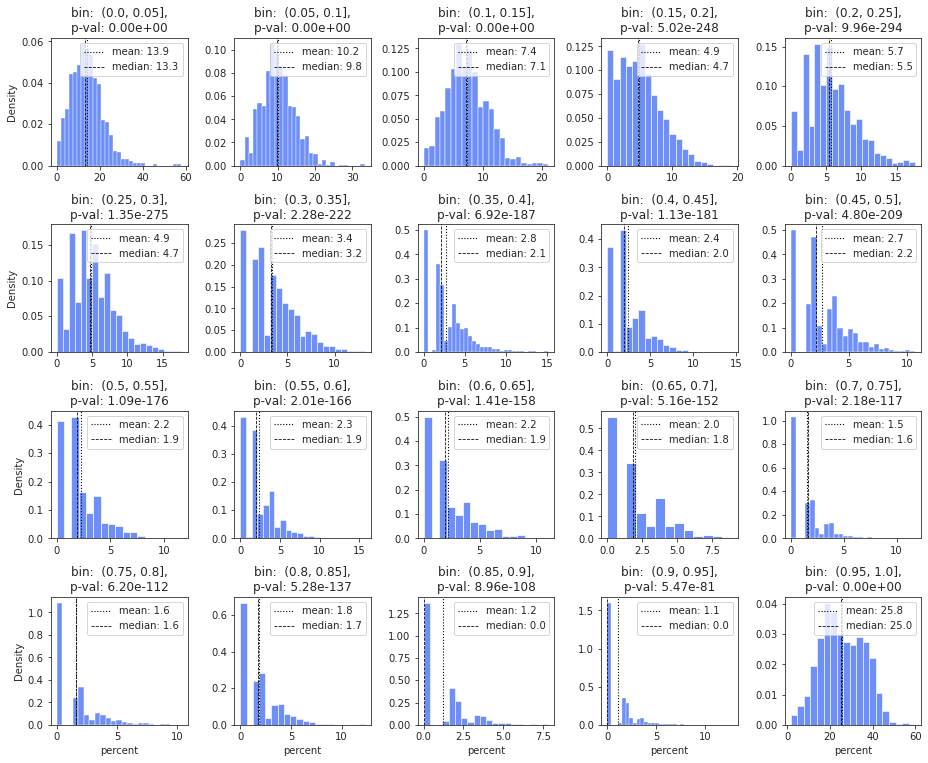

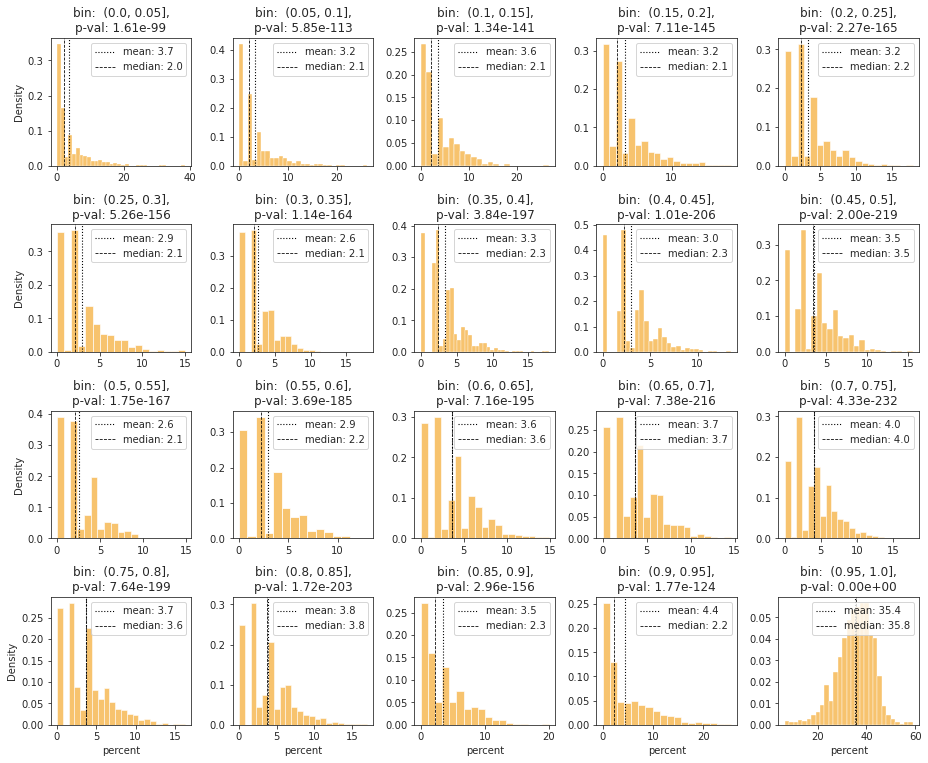

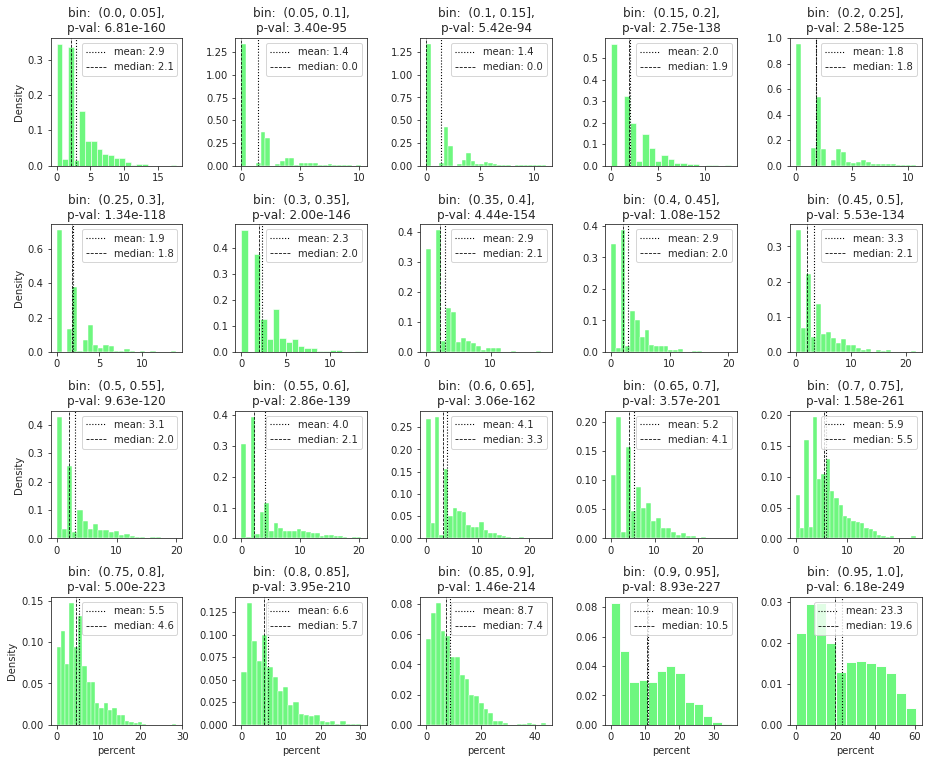

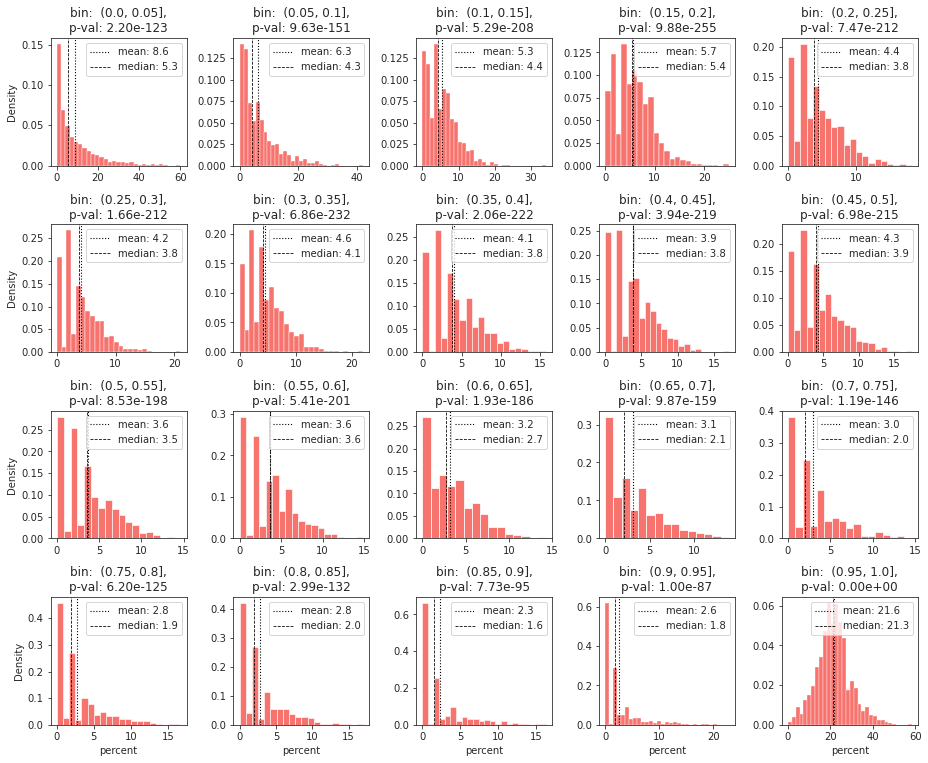

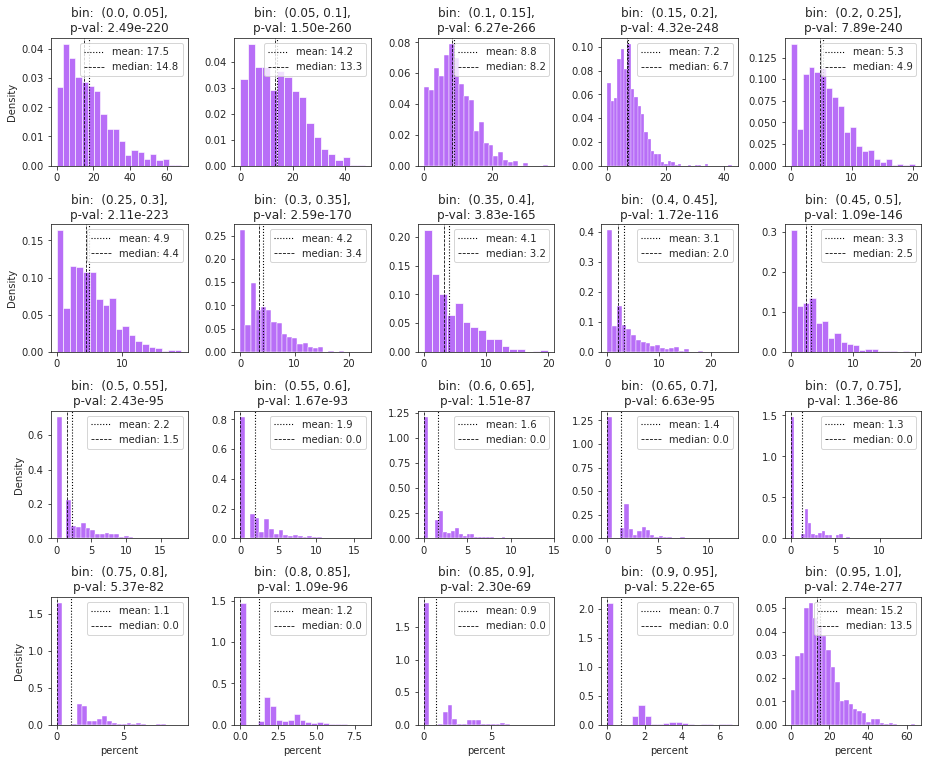

In [17]:
nrows = 4
ncols = int(np.ceil(len(intervals) / nrows))

for oc_idx, color in svinet.colors.items():
    fig, axes = create_figure(nrows, ncols, (13, 10.7), 'ticks', False, False)
    
    for idx, (ax, b) in enumerate(zip(axes.ravel(), intervals)):
        _df = df.loc[
            (df.interval == b) &
            (df.oc_idx == oc_idx)
        ]
        sns.histplot(
            data=_df,
            x='percent',
            stat='density',
            color=color,
            ax=ax,
        )
        _mean = _df.percent.mean()
        _median = _df.percent.median()
        ax.axvline(_mean, ls=':', color='k', label=f"mean: {_mean:.1f}", lw=1.1)
        ax.axvline(_median, ls='--', color='k', label=f"median: {_median:.1f}", lw=0.8)
        ax.legend(loc='upper right')

        if idx % ncols != 0:
            ax.set_ylabel('')
        if idx // ncols < nrows - 1:
            ax.set_xlabel('')

        pval = sp_stats.ttest_1samp(_df.percent, 0, alternative='greater').pvalue
        ax.set_title(f"bin:  {b},\np-val: {pval:1.2e}")

    fig.savefig(pjoin(tmp_dir, f"bin_hist_oc{oc_idx}.pdf"), bbox_inches='tight')
    plt.show()

In [70]:
_dir = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/network/bold_pearson_task-rest_sub-SLC07_ses-1_n128'
os.listdir(_dir)

[
    'graphs_cfg.npy',
    'centralities_cfg.npy',
    'centralities_cfg_cl.npy',
    'adj.npy',
    'centralities.npy',
    'graphs_cfg_cl.npy',
    'graphs.npy'
]

In [74]:
xxx = np.load(pjoin(_dir, 'graphs.npy'), allow_pickle=True).item()

In [75]:
list(xxx)

[62, 20]

In [43]:
path = '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p20/n135-k5-mmsb-seed1-linksampling'
os.listdir(path)

[
    'infer.log',
    'test.txt',
    'validation-edges.txt',
    'groups.txt',
    'param.txt',
    'test-edges.txt',
    'logl.txt',
    'network.dat',
    'communities.txt',
    'validation.txt',
    'max.txt',
    'gamma.txt',
    'lambda.txt'
]